<a href="https://colab.research.google.com/github/Sno-7178/Retail-Store-Inventory-Management/blob/main/Retail_store_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/retail_store_inventory.csv')
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunny                  0               66.16      Autumn  
2             Sunny                  1               31.32      Summer  
3            Cloudy                  1               34.74      Autumn  
4             Sunny                  0               68.95      Summer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
df.describe()

Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min       10.000000      0.000000           0.000000            5.030000  
25%       32.650000      5.000000           0.000000           32.680000  
50%       55.050000     10.000000           0.000000           55.010000  
75%       77.860000     15.000000           1.000000           77.820000  
max      100.000000     20.000000           1.000000          104.940000

DATA CLEANING

In [ ]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

print("Shape of the original DataFrame:", df.shape)

# Filter out rows where the year is 2024
df = df[df['Date'].dt.year != 2024].copy()

print("Shape of the DataFrame after dropping 2024 data:", df.shape)

# Display the head of the new DataFrame to verify the change
print("\nFirst 5 rows of the filtered DataFrame:")
print(df.head())

Shape of the original DataFrame: (73100, 15)
Shape of the DataFrame after dropping 2024 data: (73000, 15)

First 5 rows of the filtered DataFrame:
        Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Conditi

In [ ]:
# Define the path to save the updated DataFrame in your Google Drive
output_path = '/content/gdrive/MyDrive/retail_store_inventory_cleaned.csv'

# Save the DataFrame to a CSV file in your Google Drive
df.to_csv(output_path, index=False)

In [ ]:
import shutil


shutil.copy("file_path","/content/drive/MyDrive/folder_name")

**EXPLORATORY DATA ANALYSIS**

CHECKING FOR NULL VALUES

In [ ]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

FREQUENCY COUNT OF STORES AND THE NO.OF PRODUCTS

In [ ]:
categorical_columns=df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nFrequency counts for {col}:")
    print(df[col].value_counts())
    print(f"Percentage distribution for {col}:")


Frequency counts for Date:
Date
2024-01-01    100
2022-01-01    100
2022-01-02    100
2022-01-03    100
2022-01-04    100
             ... 
2022-01-16    100
2022-01-15    100
2022-01-14    100
2022-01-13    100
2022-01-12    100
Name: count, Length: 731, dtype: int64
Percentage distribution for Date:

Frequency counts for Store ID:
Store ID
S001    14620
S002    14620
S003    14620
S004    14620
S005    14620
Name: count, dtype: int64
Percentage distribution for Store ID:

Frequency counts for Product ID:
Product ID
P0001    3655
P0002    3655
P0003    3655
P0004    3655
P0005    3655
P0006    3655
P0007    3655
P0008    3655
P0009    3655
P0010    3655
P0011    3655
P0012    3655
P0013    3655
P0014    3655
P0015    3655
P0016    3655
P0017    3655
P0018    3655
P0019    3655
P0020    3655
Name: count, dtype: int64
Percentage distribution for Product ID:

Frequency counts for Category:
Category
Furniture      14699
Toys           14643
Clothing       14626
Groceries      14611
Elect

In [ ]:
print(f"Total number of stores: {df['Store ID'].nunique()}")
print(f"Total number of products: {df['Product ID'].nunique()}")
print(f"Date range: from {df['Date'].min()} to {df['Date'].max()}")

Total number of stores: 5
Total number of products: 20
Date range: from 2022-01-01 to 2024-01-01


BAR PLOT FOR NO OF PRODUCTS SOLD BY CATEGORY

Bar chart has been successfully created and saved.


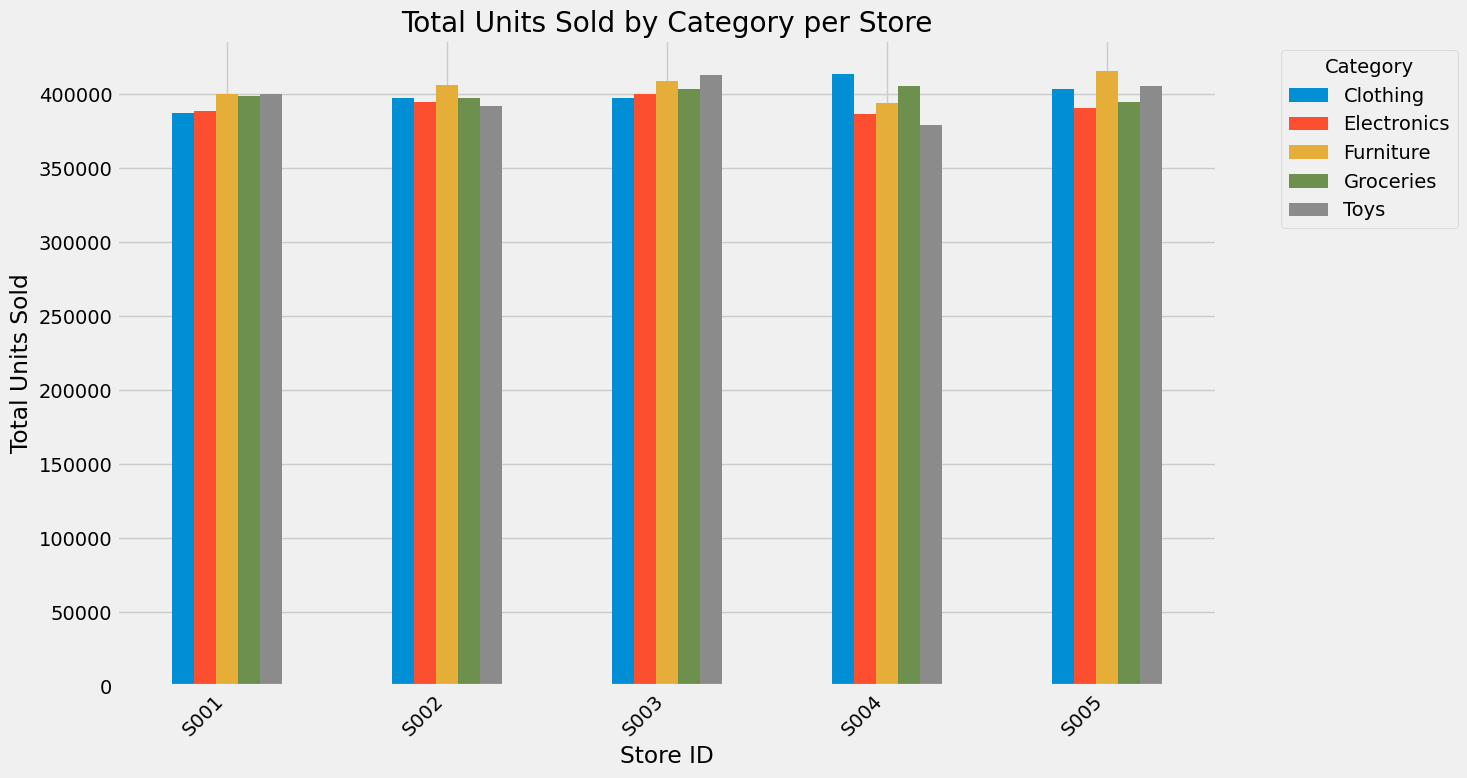

In [ ]:
# Group by 'Store ID' and 'Category' and sum the 'Units Sold'
sales_by_store_category = df.groupby(['Store ID', 'Category'])['Units Sold'].sum().reset_index()

# Pivot the table so that 'Category' becomes the columns and 'Store ID' becomes the index.
pivot_sales = sales_by_store_category.pivot(index='Store ID', columns='Category', values='Units Sold')

# Plotting the data as a grouped bar chart
plt.style.use('fivethirtyeight')
pivot_sales.plot(kind='bar', figsize=(15, 8))
plt.title('Total Units Sold by Category per Store')
plt.xlabel('Store ID')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot to a file
plt.savefig('units_sold_by_store_and_category_bar_chart.png')

print("Bar chart has been successfully created and saved.")

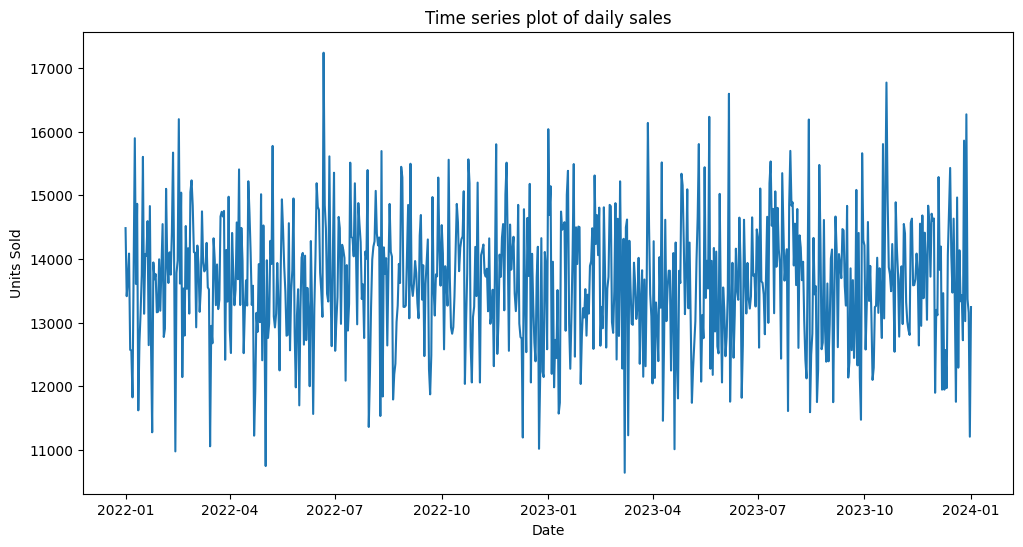

In [ ]:
df['Date']= pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Units Sold'].sum().reset_index()

#for plotting the daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Units Sold'])
plt.title('Time series plot of daily sales')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

MONTHLY SALES TREND

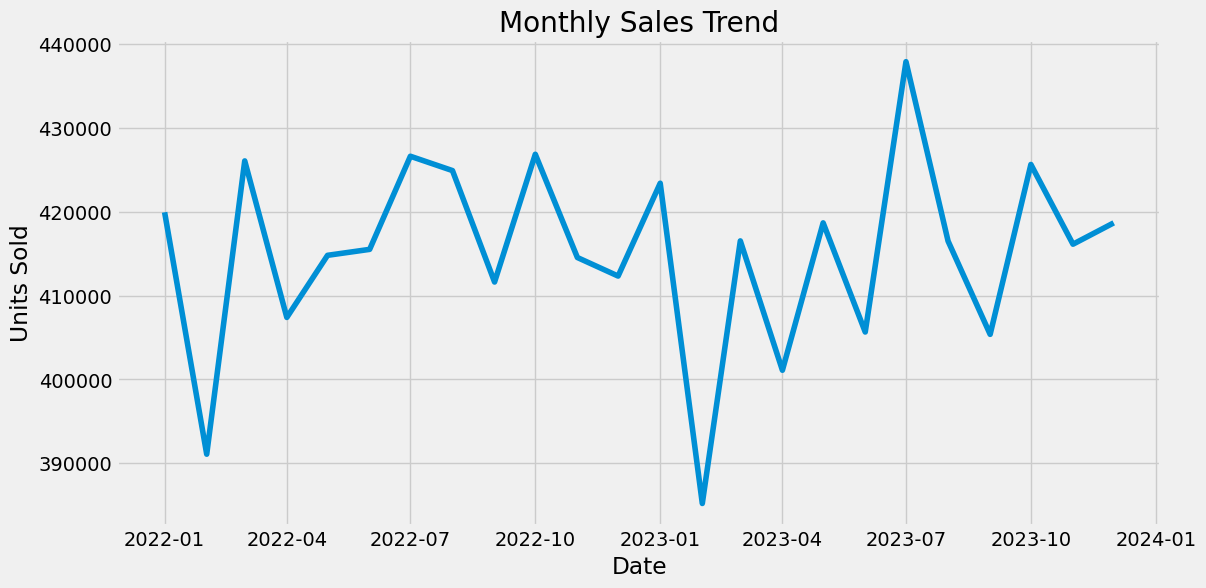

In [ ]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Units Sold'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Units Sold'])
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

TOTAL UNITS SOLD PER YEAR AND MONTH AND ALSO CONSTRUTED PIVOT *TABLE*

--- Visualizing Yearly and Monthly Trends ---


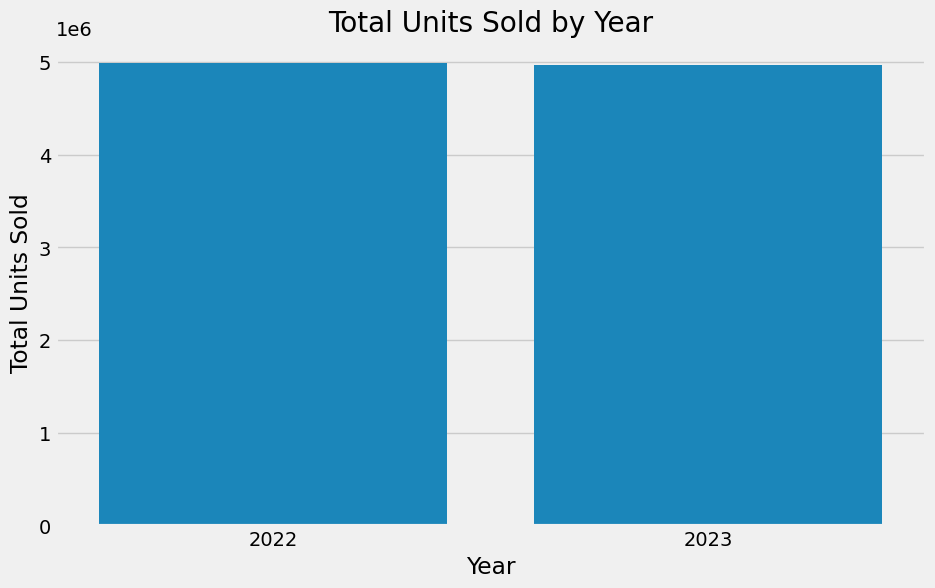

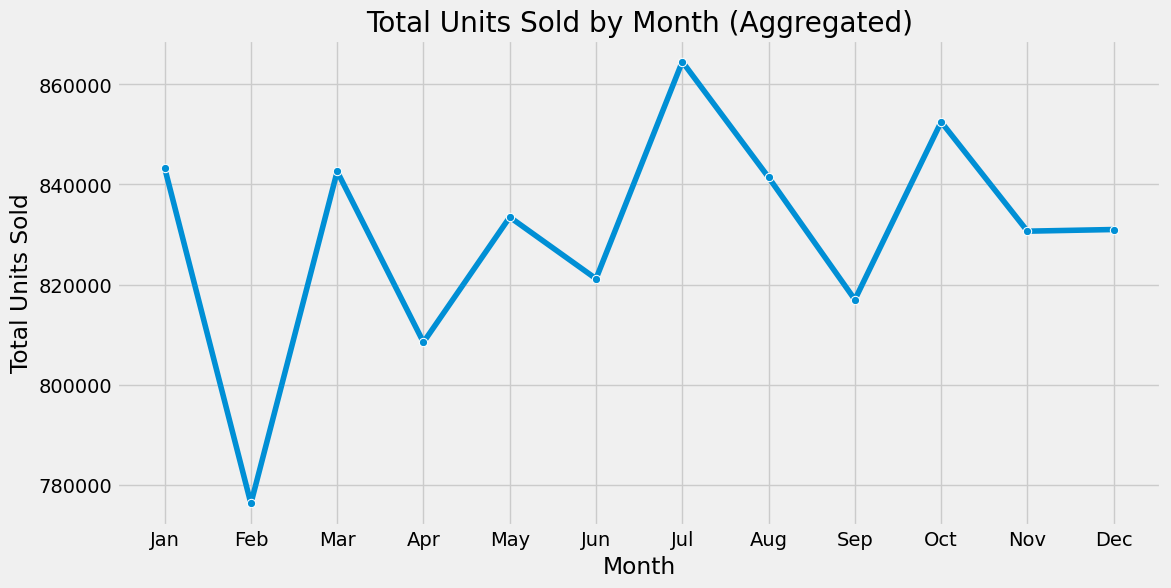

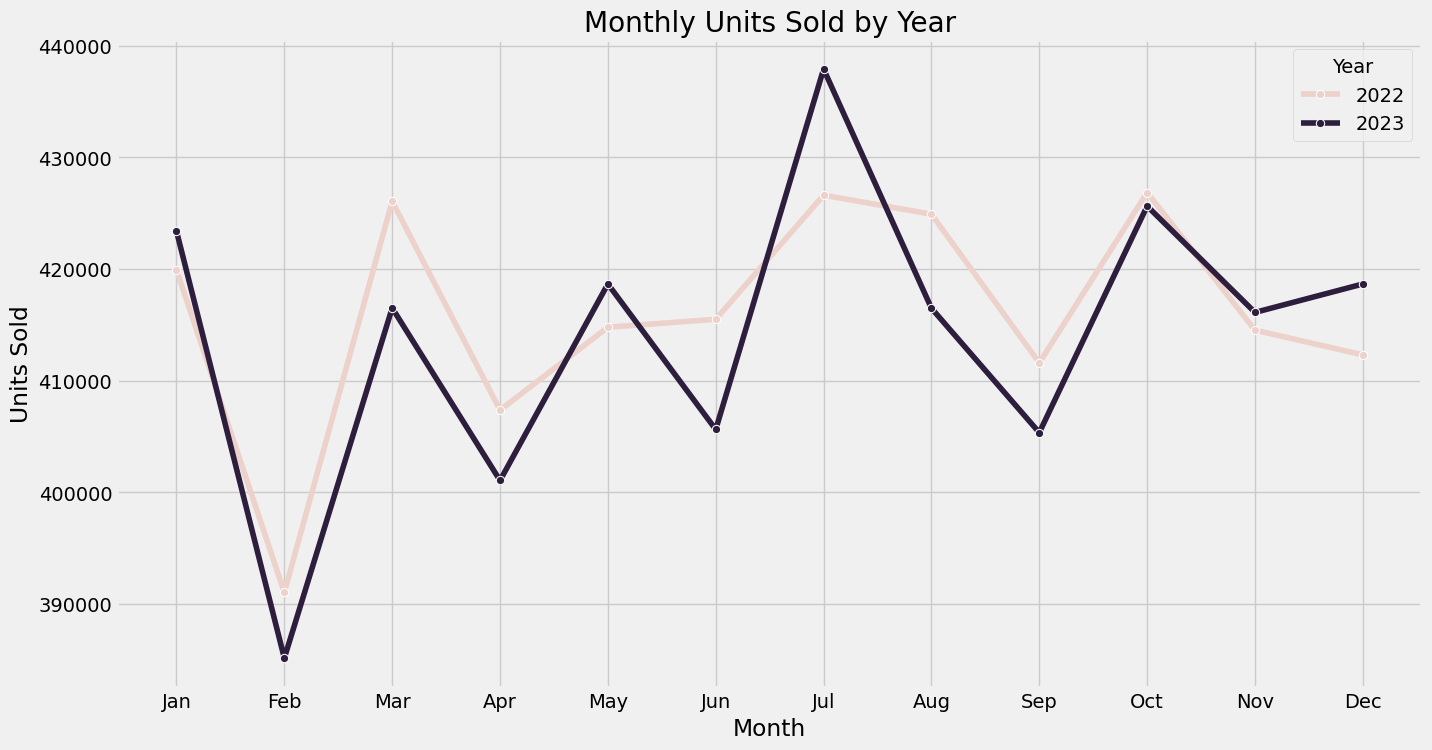

Year            2022                                                        \
Month             1        2        3        4        5        6        7    
Category                                                                     
Clothing     77477.0  89806.0  75774.0  80313.0  77888.0  86090.0  90564.0   
Electronics  90499.0  73086.0  81286.0  79395.0  82150.0  75387.0  83049.0   
Furniture    87502.0  75323.0  90011.0  80662.0  80683.0  82344.0  79789.0   
Groceries    82139.0  73426.0  93263.0  83534.0  91021.0  87555.0  88920.0   
Toys         82321.0  79411.0  85739.0  83476.0  83057.0  84133.0  84306.0   

Year                                    ...     2023                    \
Month             8        9        10  ...       3        4        5    
Category                                ...                              
Clothing     81421.0  83628.0  79739.0  ...  84569.0  89083.0  82884.0   
Electronics  86608.0  81427.0  88306.0  ...  77437.0  72150.0  84615.0   
Furni

In [ ]:
# --- 1. Data Preprocessing for Year/Month Analysis ---
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year and month from the 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# --- 2. Aggregate Sales Data by Year and Month ---
# Calculate total 'Units Sold' for each year
yearly_sales = df.groupby('Year')['Units Sold'].sum().reset_index()

# Calculate total 'Units Sold' for each month
# This will show the seasonal pattern across all years combined
monthly_sales = df.groupby('Month')['Units Sold'].sum().reset_index()

# --- 3. Visualizations ---
print("--- Visualizing Yearly and Monthly Trends ---")

# Plot Yearly Sales Trends
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Units Sold', data=yearly_sales)
plt.title('Total Units Sold by Year')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.show()

# Plot Monthly Sales Trends
# You can use a line plot to show the trend across the months
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Units Sold', data=monthly_sales, marker='o')
plt.title('Total Units Sold by Month (Aggregated)')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Plot a combined view of Monthly Sales for each Year
plt.figure(figsize=(15, 8))
# Create a pivot table to easily plot each year's data
monthly_yearly_sales = df.groupby(['Year', 'Month'])['Units Sold'].sum().reset_index()
sns.lineplot(data=monthly_yearly_sales, x='Month', y='Units Sold', hue='Year', marker='o')
plt.title('Monthly Units Sold by Year')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year')
plt.show()
# Group by year, month, and category and sum the 'Units Sold'
monthly_sales = df.groupby(['Year', 'Month', 'Category'])['Units Sold'].sum().reset_index()

# Create a pivot table for a clean, user-friendly output format
pivot_table = monthly_sales.pivot_table(
    index='Category',
    columns=['Year', 'Month'],
    values='Units Sold',
    fill_value=0
)

# Print the final pivot table
print(pivot_table)


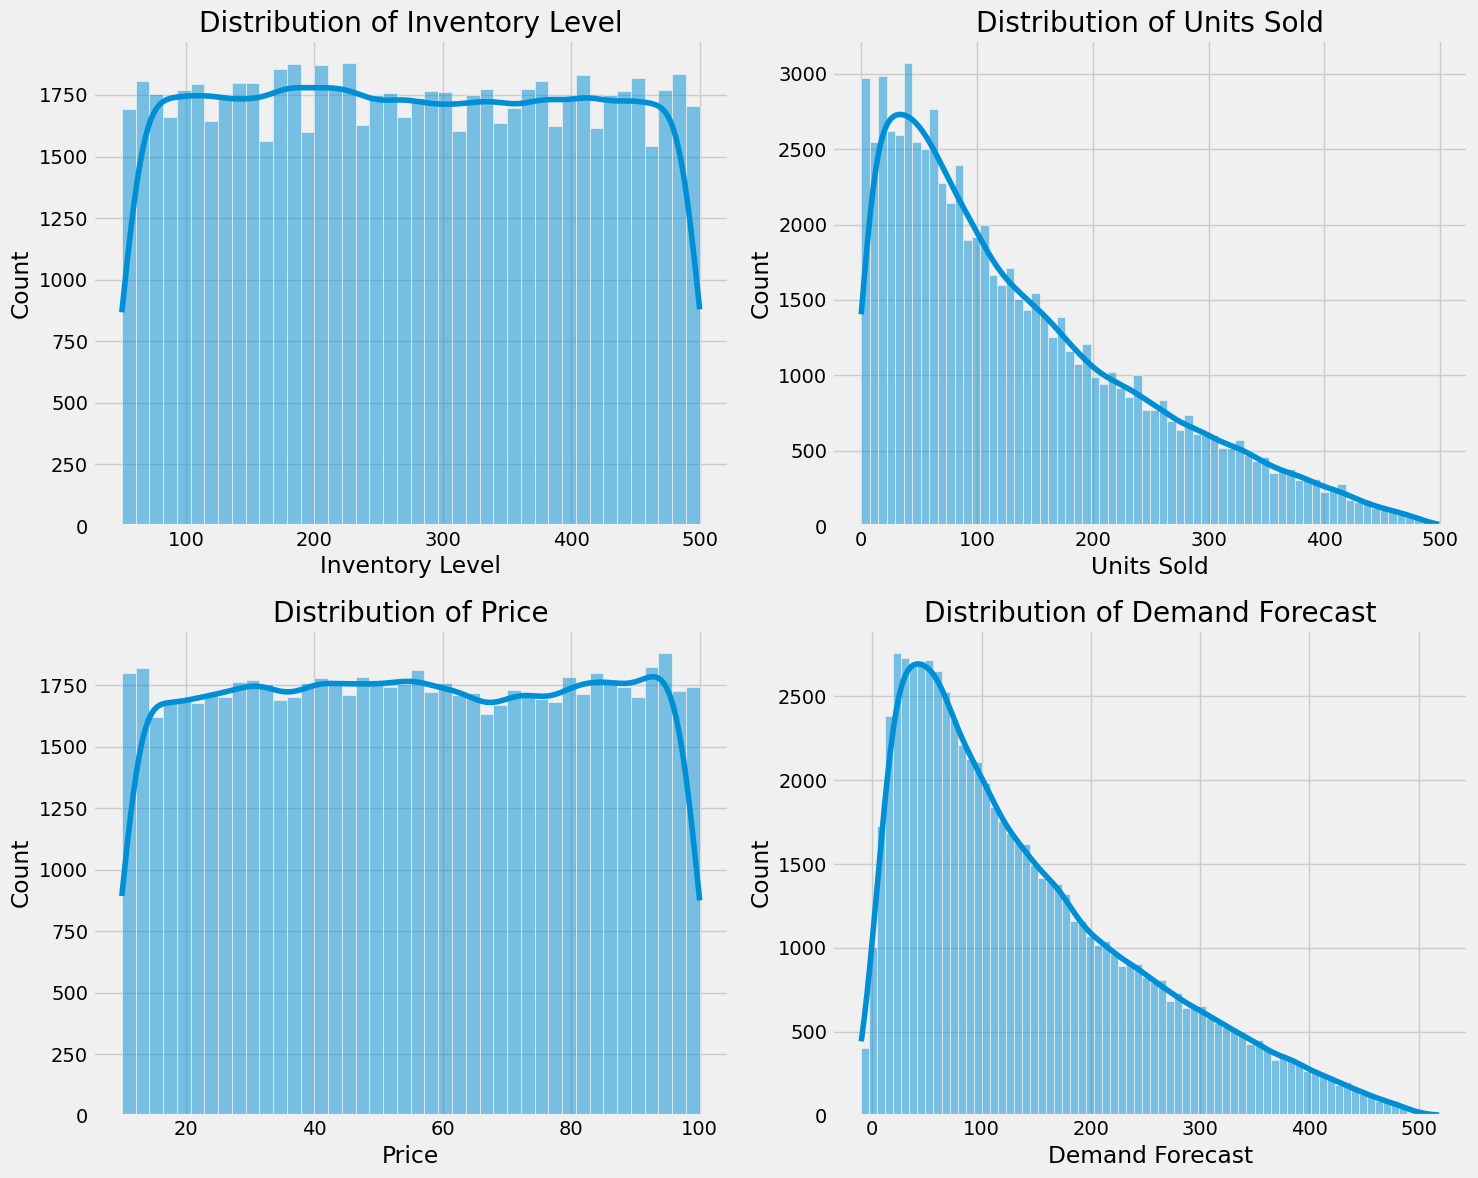

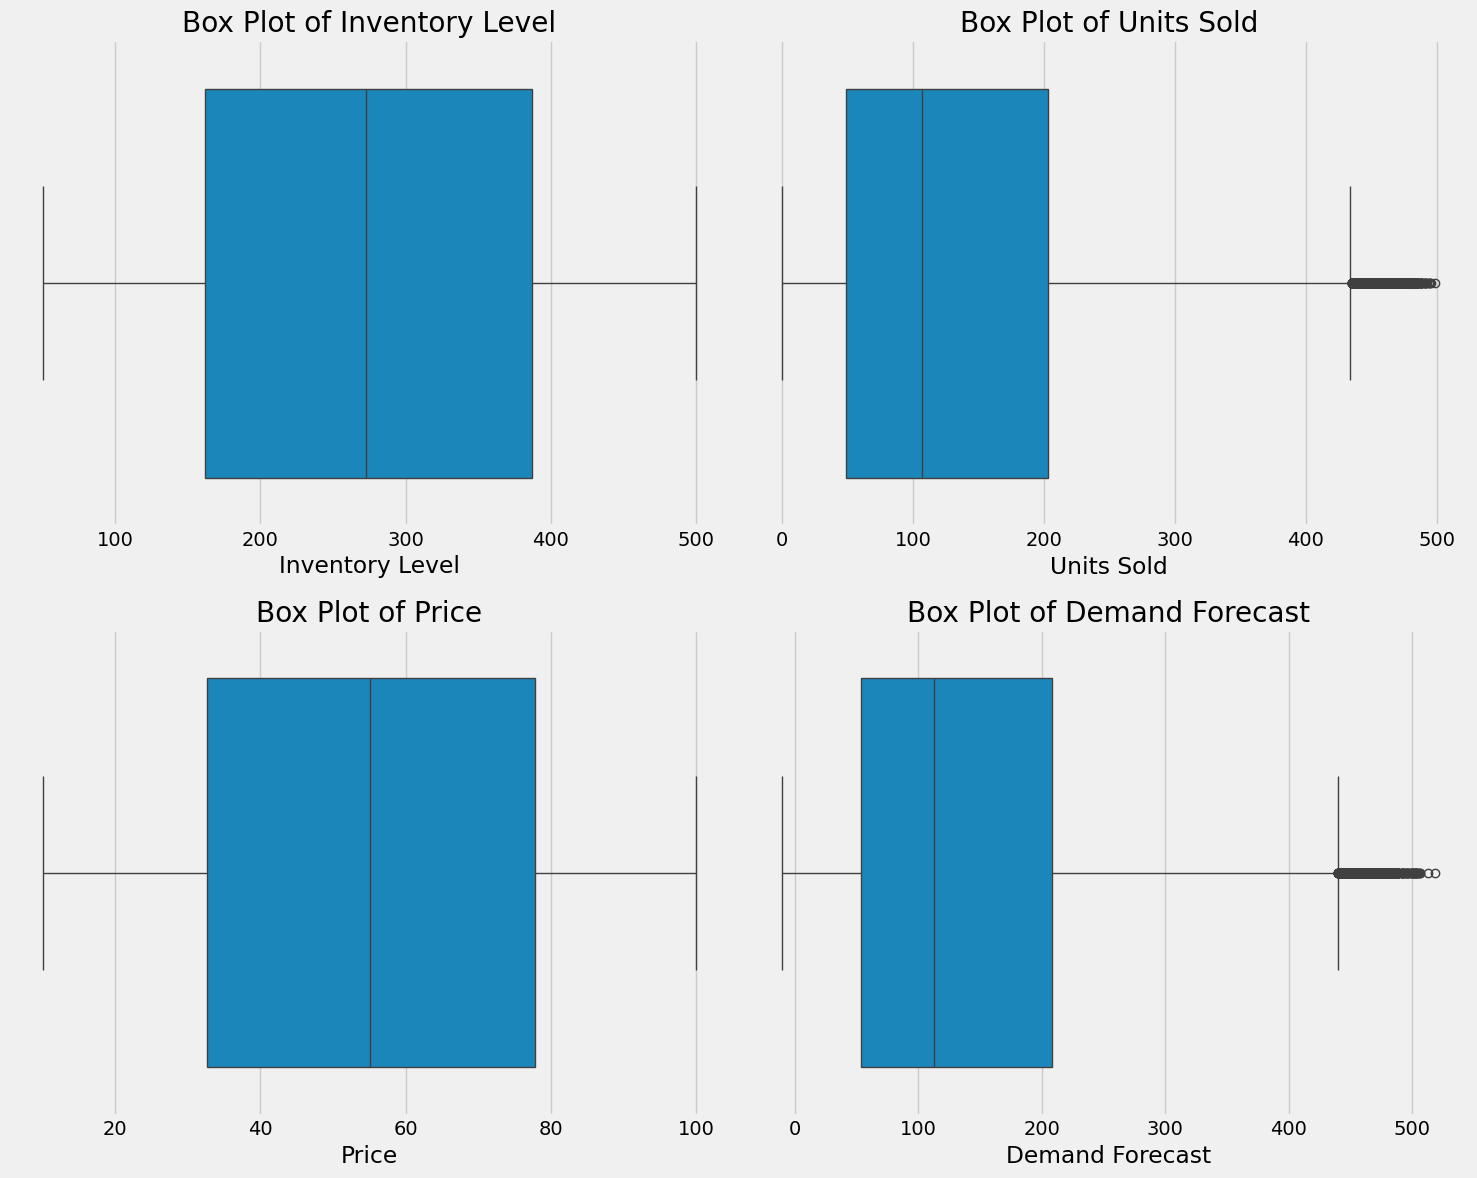

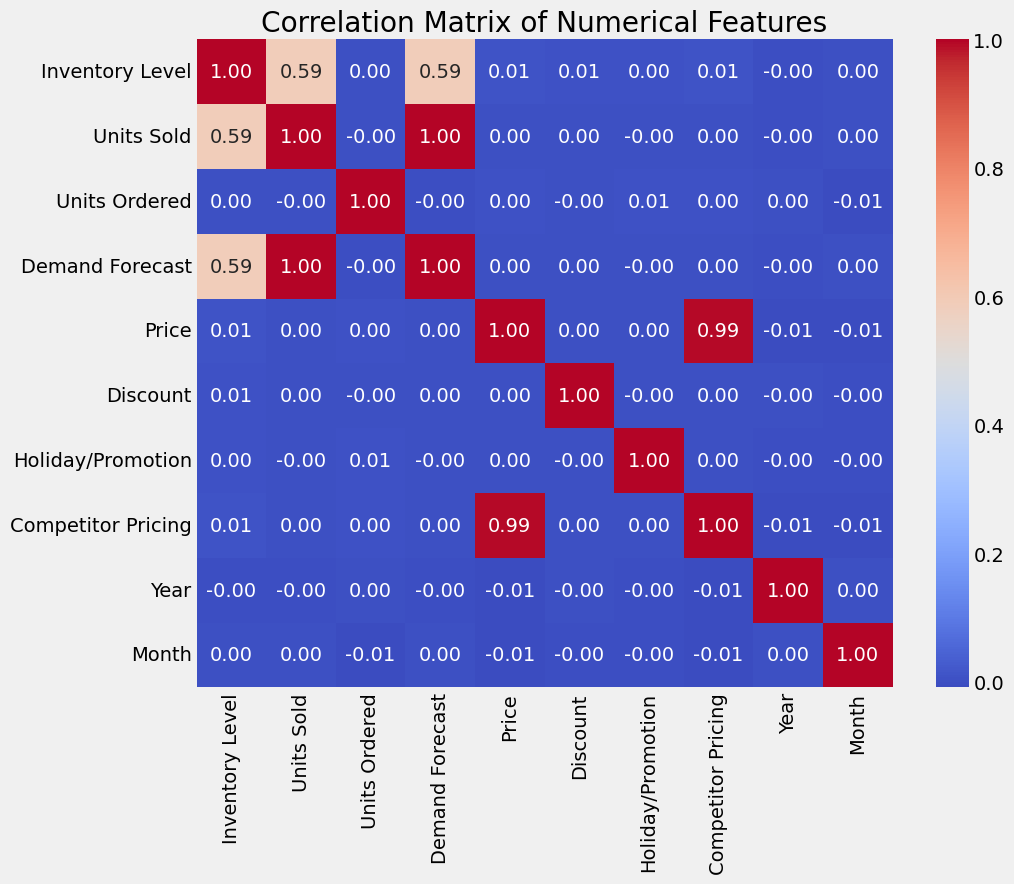

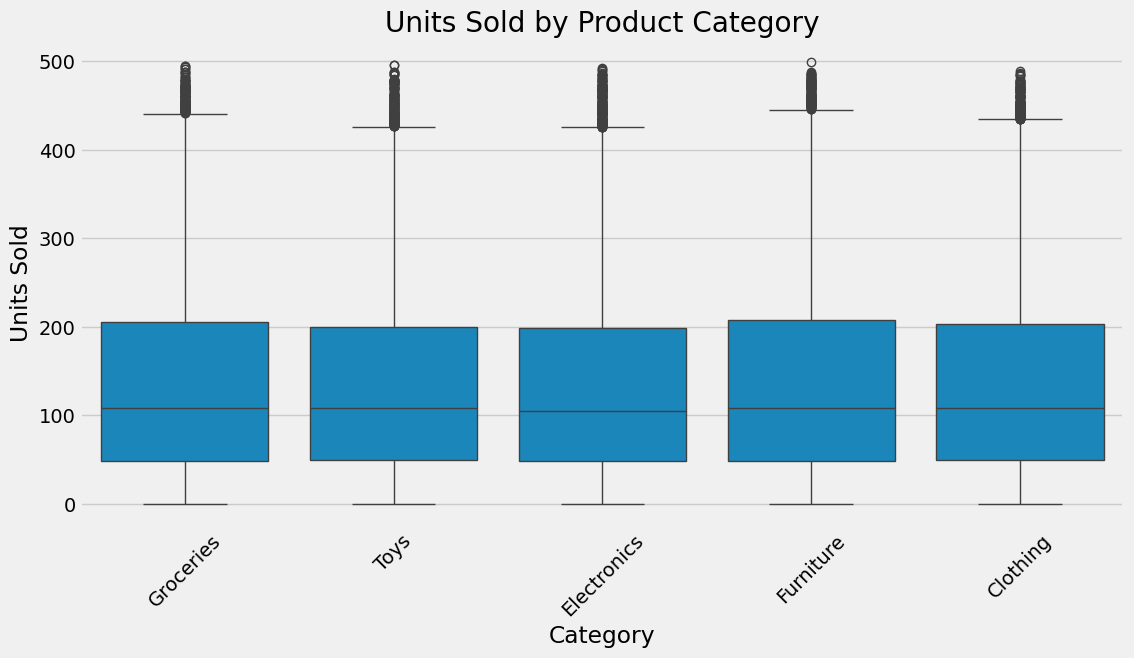

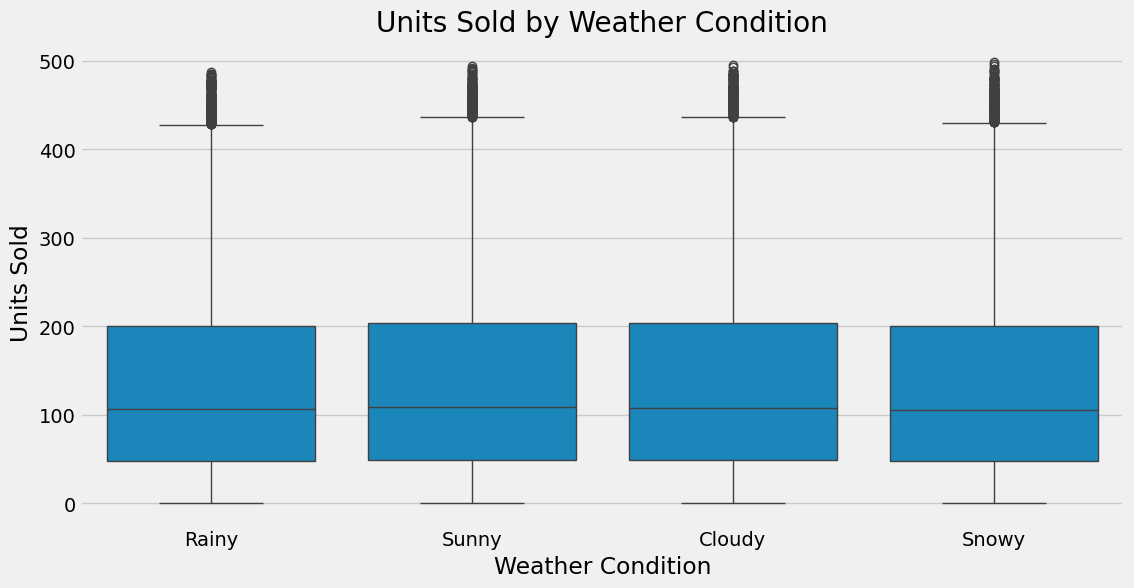

In [ ]:
# Histogram of key numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
sns.histplot(df['Inventory Level'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Inventory Level')

sns.histplot(df['Units Sold'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Units Sold')

sns.histplot(df['Price'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Price')

sns.histplot(df['Demand Forecast'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Demand Forecast')
plt.tight_layout()
plt.show()

# Box plots to identify outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
sns.boxplot(x=df['Inventory Level'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Inventory Level')

sns.boxplot(x=df['Units Sold'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Units Sold')

sns.boxplot(x=df['Price'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Price')

sns.boxplot(x=df['Demand Forecast'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Demand Forecast')
plt.tight_layout()
plt.show()

# Correlation Heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Bivariate analysis: Units Sold vs. Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Units Sold', data=df)
plt.title('Units Sold by Product Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

# Bivariate analysis: Units Sold vs. Weather Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather Condition', y='Units Sold', data=df)
plt.title('Units Sold by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Units Sold')
plt.show()

--- Analysis of Holiday/Promotion Impact ---

Total Units Sold by Holiday/Promotion:
   Holiday/Promotion  Units Sold  Percentage
0                  0     5008765   50.277003
1                  1     4953573   49.722997


--- Analysis of Seasonality Impact ---

Total Units Sold by Season:
  Seasonality  Units Sold  Percentage
0      Autumn     2504689   25.141578
1      Spring     2484121   24.935121
2      Summer     2476443   24.858050
3      Winter     2497085   25.065251




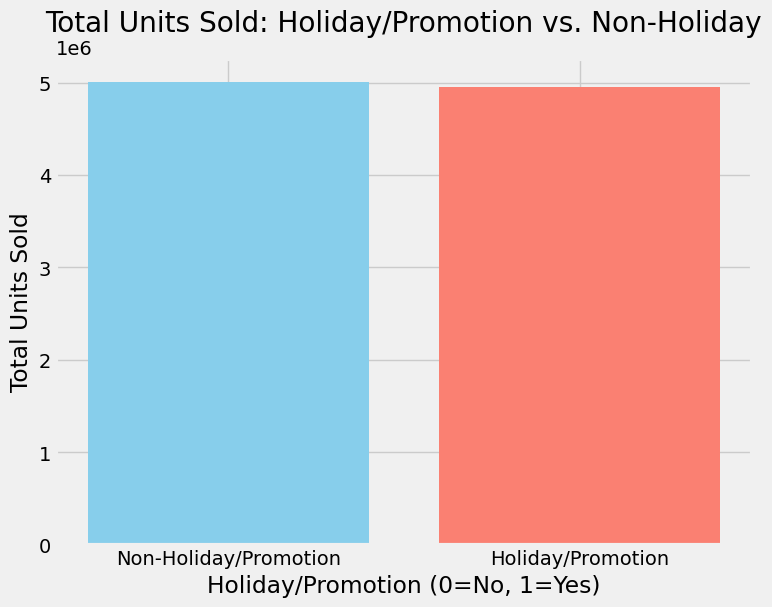

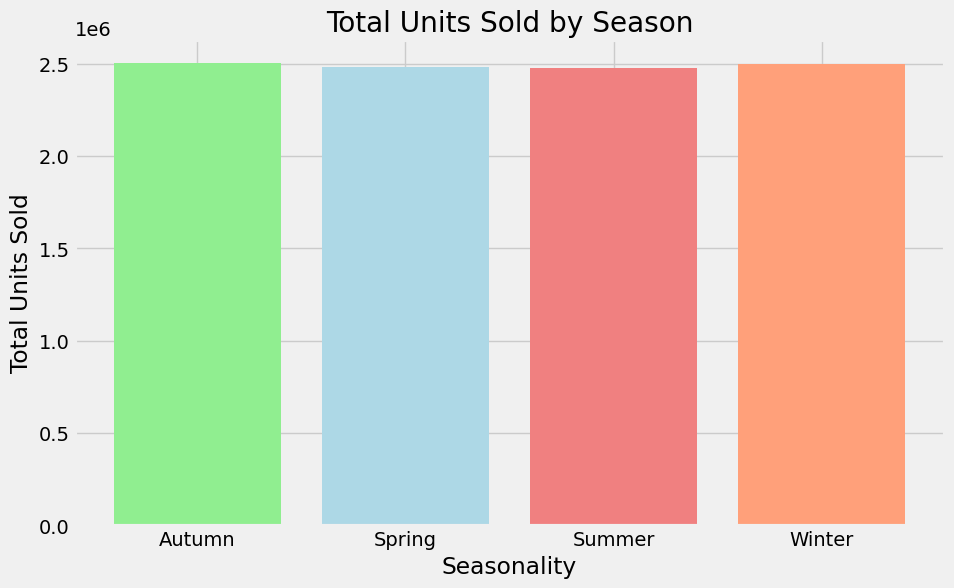

In [ ]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Analysis of Holiday/Promotion Impact
print("--- Analysis of Holiday/Promotion Impact ---")
holiday_sales = df.groupby('Holiday/Promotion')['Units Sold'].sum().reset_index()
total_sales = holiday_sales['Units Sold'].sum()

# Calculate percentages
holiday_sales['Percentage'] = (holiday_sales['Units Sold'] / total_sales) * 100
print("\nTotal Units Sold by Holiday/Promotion:")
print(holiday_sales)
print("\n")

# Analysis of Seasonality Impact
print("--- Analysis of Seasonality Impact ---")
# Group by Seasonality and calculate total Units Sold
seasonal_sales = df.groupby('Seasonality')['Units Sold'].sum().reset_index()
total_sales_seasonal = seasonal_sales['Units Sold'].sum()

# Calculate percentages
seasonal_sales['Percentage'] = (seasonal_sales['Units Sold'] / total_sales_seasonal) * 100

print("\nTotal Units Sold by Season:")
print(seasonal_sales)
print("\n")

# Visualizations
# Plot for Holiday/Promotion
plt.figure(figsize=(8, 6))
plt.bar(holiday_sales['Holiday/Promotion'], holiday_sales['Units Sold'], color=['skyblue', 'salmon'])
plt.title('Total Units Sold: Holiday/Promotion vs. Non-Holiday')
plt.xlabel('Holiday/Promotion (0=No, 1=Yes)')
plt.ylabel('Total Units Sold')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday/Promotion', 'Holiday/Promotion'])
plt.show()

# Plot for Seasonality
plt.figure(figsize=(10, 6))
plt.bar(seasonal_sales['Seasonality'], seasonal_sales['Units Sold'], color=['lightgreen', 'lightblue', 'lightcoral', 'lightsalmon'])
plt.title('Total Units Sold by Season')
plt.xlabel('Seasonality')
plt.ylabel('Total Units Sold')
plt.show()

--- Visualizing Holiday/Promotion Impact on Sales by Category and Region ---


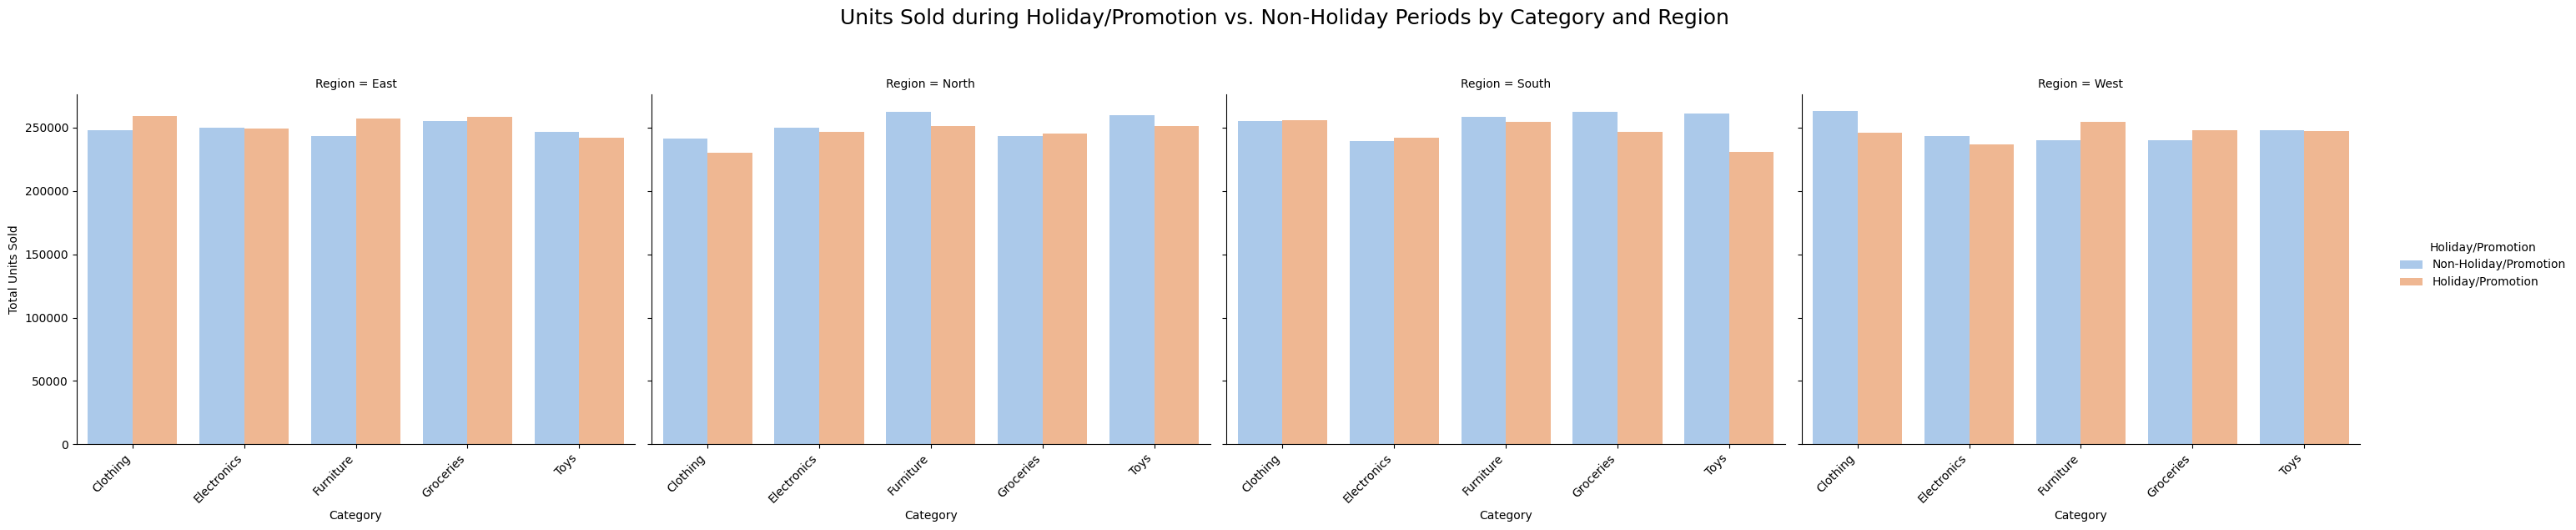


--- Sales Distribution by Holiday/Promotion Status ---
Holiday/Promotion
Holiday/Promotion        4953573
Non-Holiday/Promotion    5008765
Name: Units Sold, dtype: int64

--- Percentage of Holiday/Promotion Sales by Region and Category ---
Holiday/Promotion   Holiday/Promotion  Non-Holiday/Promotion     Total  \
Region Category                                                          
West   Furniture             254859.0               240157.0  495016.0   
East   Furniture             256994.0               243062.0  500056.0   
       Clothing              259215.0               247659.0  506874.0   
West   Groceries             247624.0               239906.0  487530.0   
East   Groceries             258341.0               255072.0  513413.0   
South  Electronics           241994.0               239284.0  481278.0   
North  Groceries             245169.0               243373.0  488542.0   
South  Clothing              255713.0               255076.0  510789.0   
West   Toys        

In [ ]:

# Group by Holiday/Promotion, Region, and Category and calculate total units sold
holiday_category_sales = df.groupby(['Holiday/Promotion', 'Region', 'Category'])['Units Sold'].sum().reset_index()

# Rename the 'Holiday/Promotion' values for better plot labels
holiday_category_sales['Holiday/Promotion'] = holiday_category_sales['Holiday/Promotion'].astype(str).replace({'0': 'Non-Holiday/Promotion', '1': 'Holiday/Promotion'})

# --- 3. Visualization
print("--- Visualizing Holiday/Promotion Impact on Sales by Category and Region ---")

# Create a faceted bar plot to show the comparison across regions
g = sns.catplot(
    data=holiday_category_sales,
    x='Category',
    y='Units Sold',
    hue='Holiday/Promotion',
    col='Region',
    kind='bar',
    height=6,
    aspect=1.2,
    palette='pastel'
)

g.fig.suptitle('Units Sold during Holiday/Promotion vs. Non-Holiday Periods by Category and Region', fontsize=18, y=1.05)
g.set_axis_labels('Category', 'Total Units Sold')
g.set_xticklabels(rotation=45, ha='right')
g.tight_layout()
plt.savefig('holiday_impact_by_category_region.png')
plt.show()

# Calculate the total sales for each Holiday/Promotion status
total_sales_by_status = holiday_category_sales.groupby('Holiday/Promotion')['Units Sold'].sum()

print("\n--- Sales Distribution by Holiday/Promotion Status ---")
print(total_sales_by_status)

# Now, calculate the percentage of total sales for each category during holidays vs. non-holidays.
# First, pivot the table for easier percentage calculation
pivot_sales = holiday_category_sales.pivot_table(
    index=['Region', 'Category'],
    columns='Holiday/Promotion',
    values='Units Sold',
    fill_value=0
)

# Calculate the total units sold for each category-region combo
pivot_sales['Total'] = pivot_sales['Holiday/Promotion'] + pivot_sales['Non-Holiday/Promotion']

# Calculate the percentage of holiday sales out of the total for each combo
pivot_sales['Holiday_Sales_Percentage'] = (pivot_sales['Holiday/Promotion'] / pivot_sales['Total']) * 100

print("\n--- Percentage of Holiday/Promotion Sales by Region and Category ---")
print(pivot_sales.sort_values(by='Holiday_Sales_Percentage', ascending=False))

UNITS SOLD IN DIFFERERNT SEASONS BY CATEGORY AND REGIONS

--- Visualizing Sales and Inventory by Season, Region, and Category ---


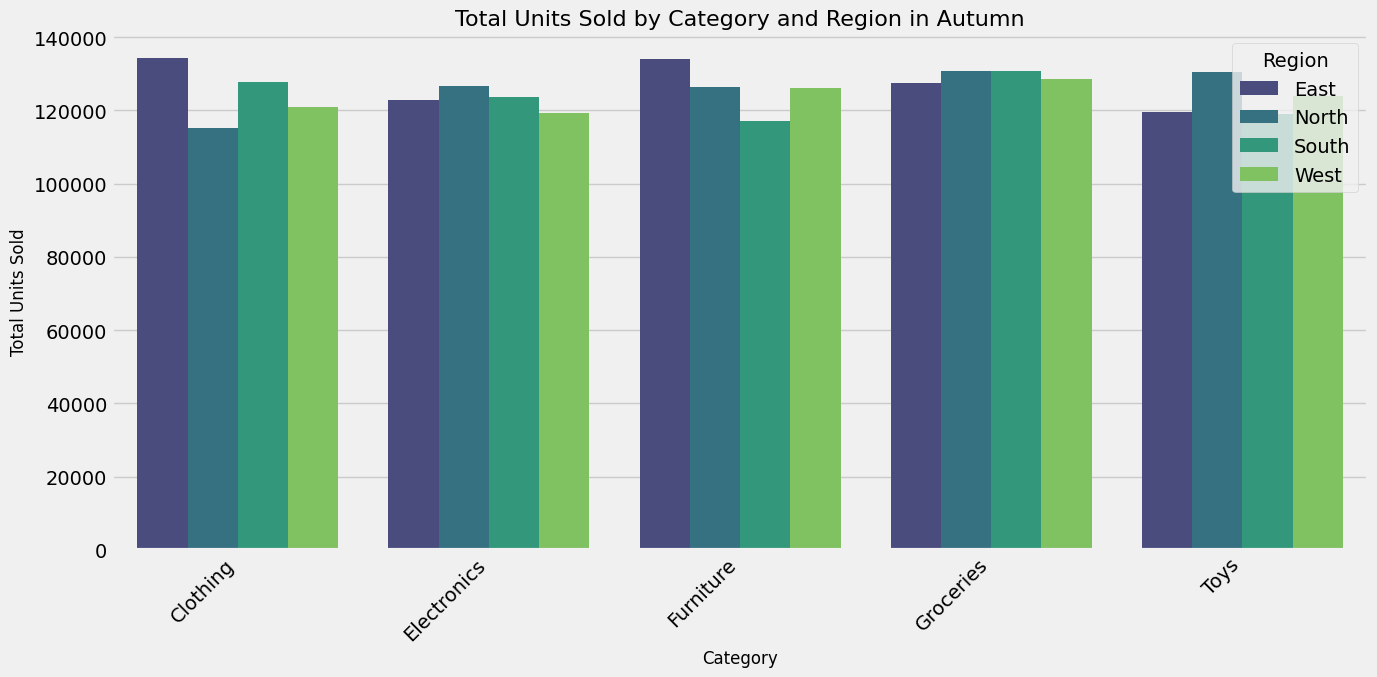

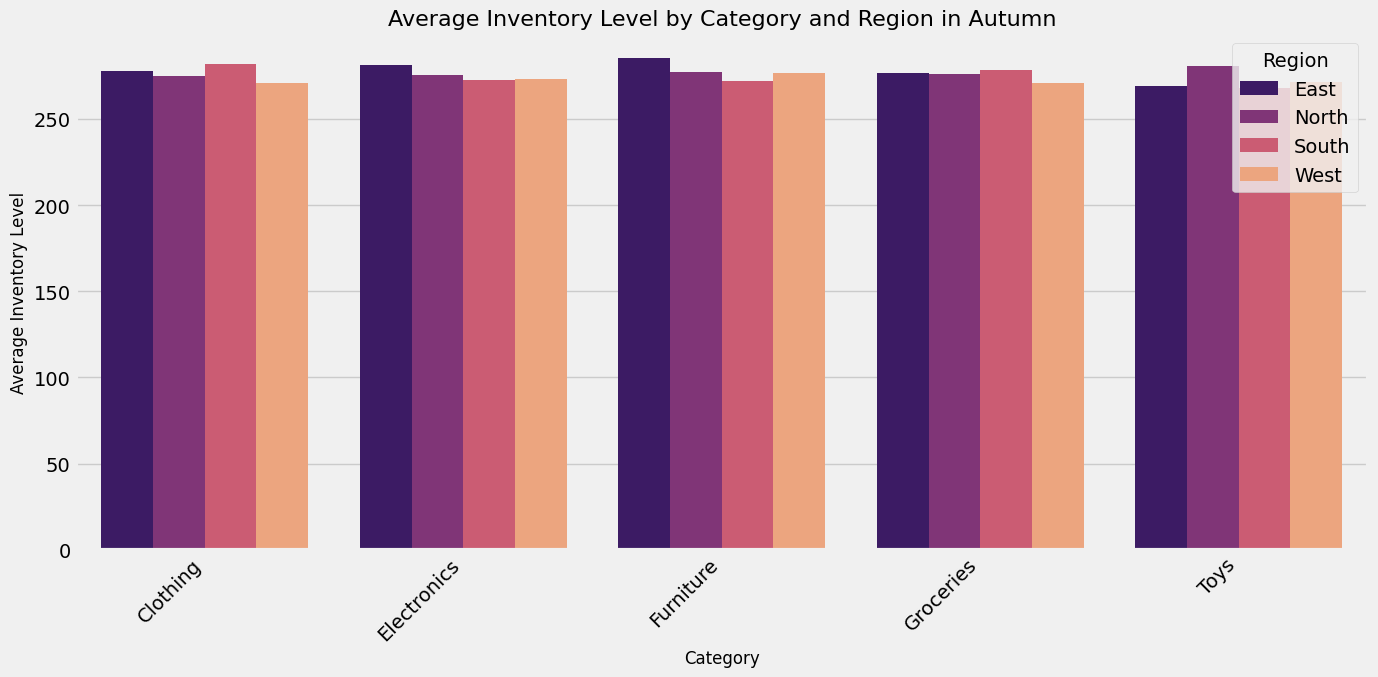

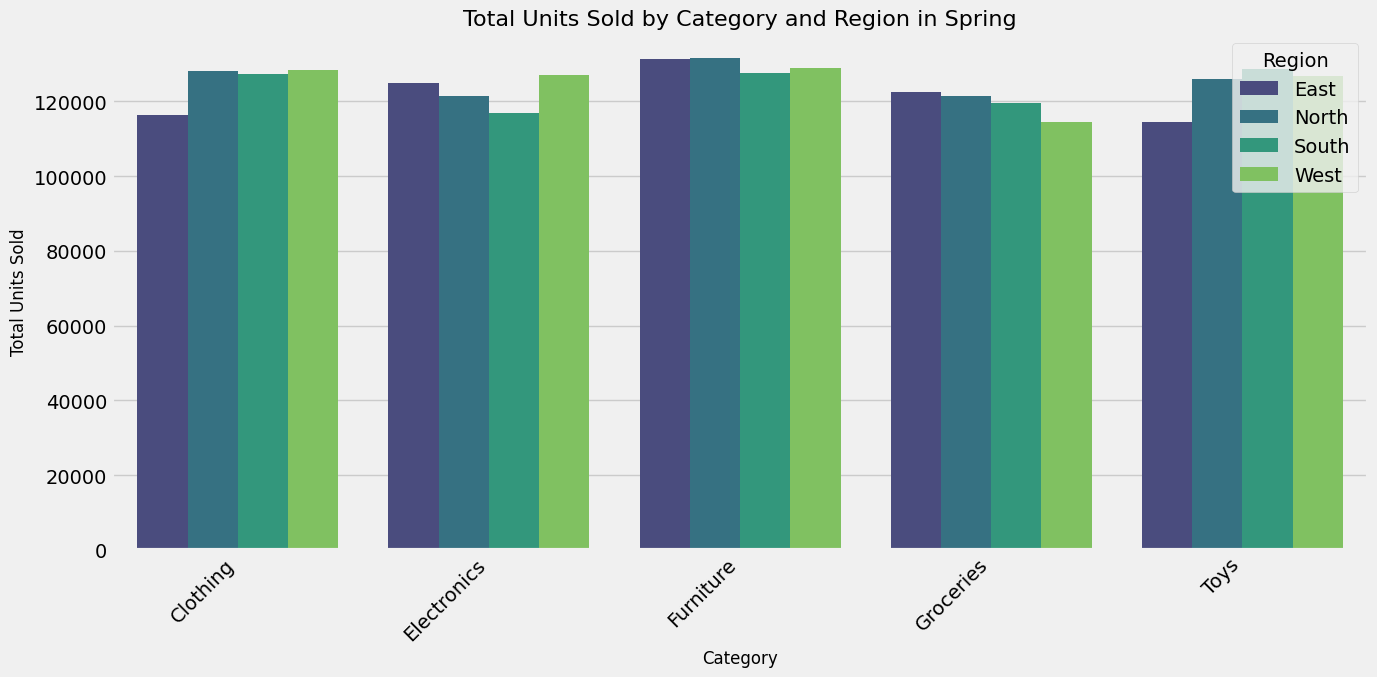

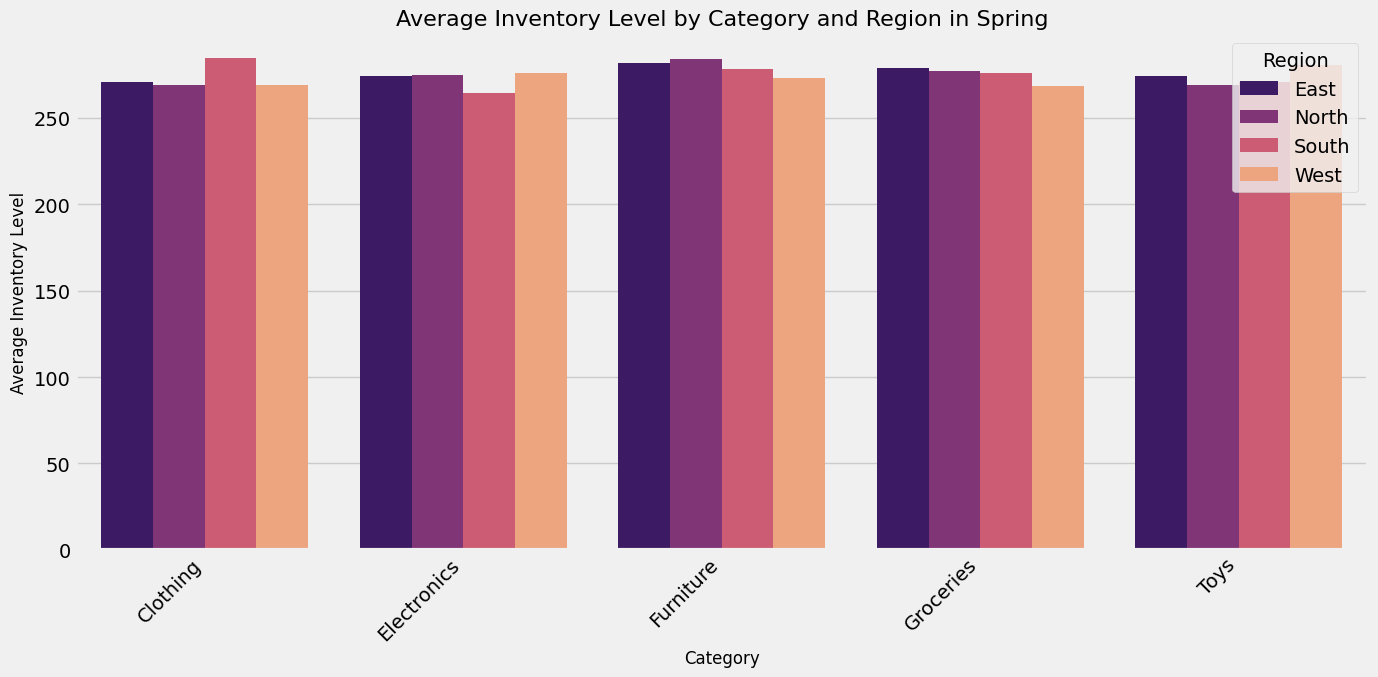

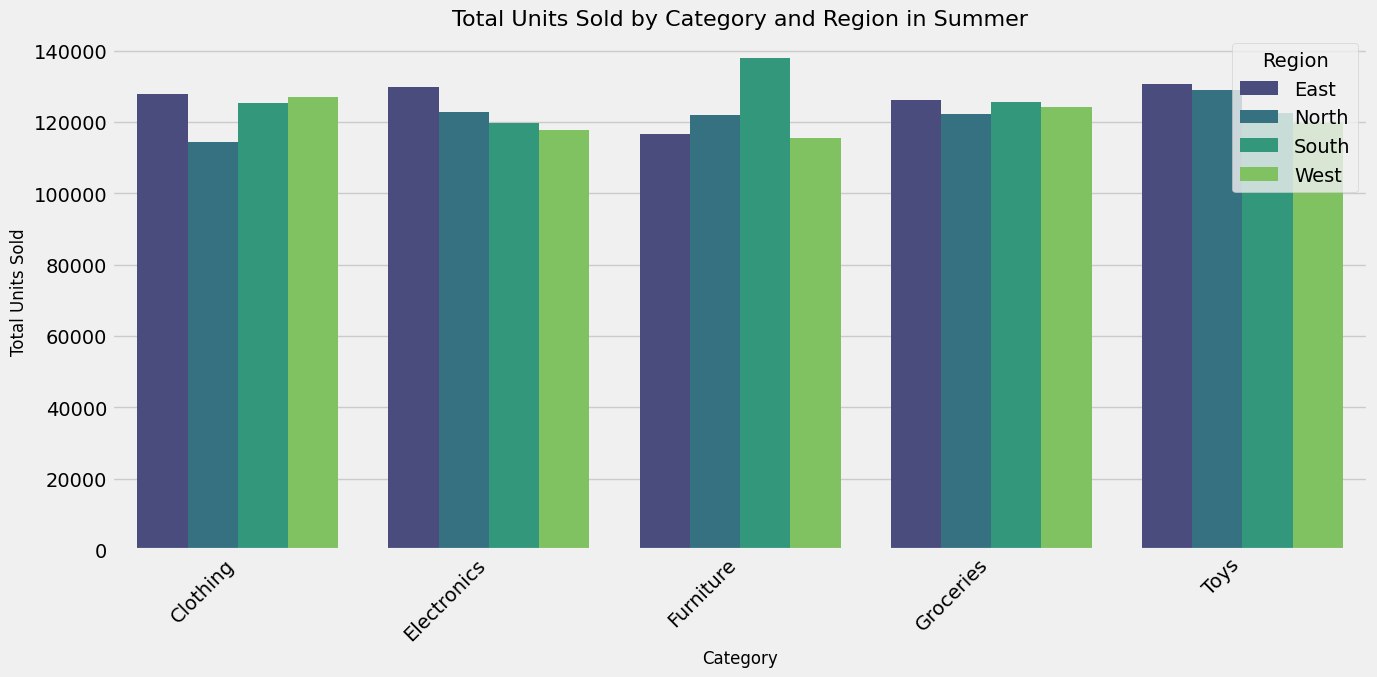

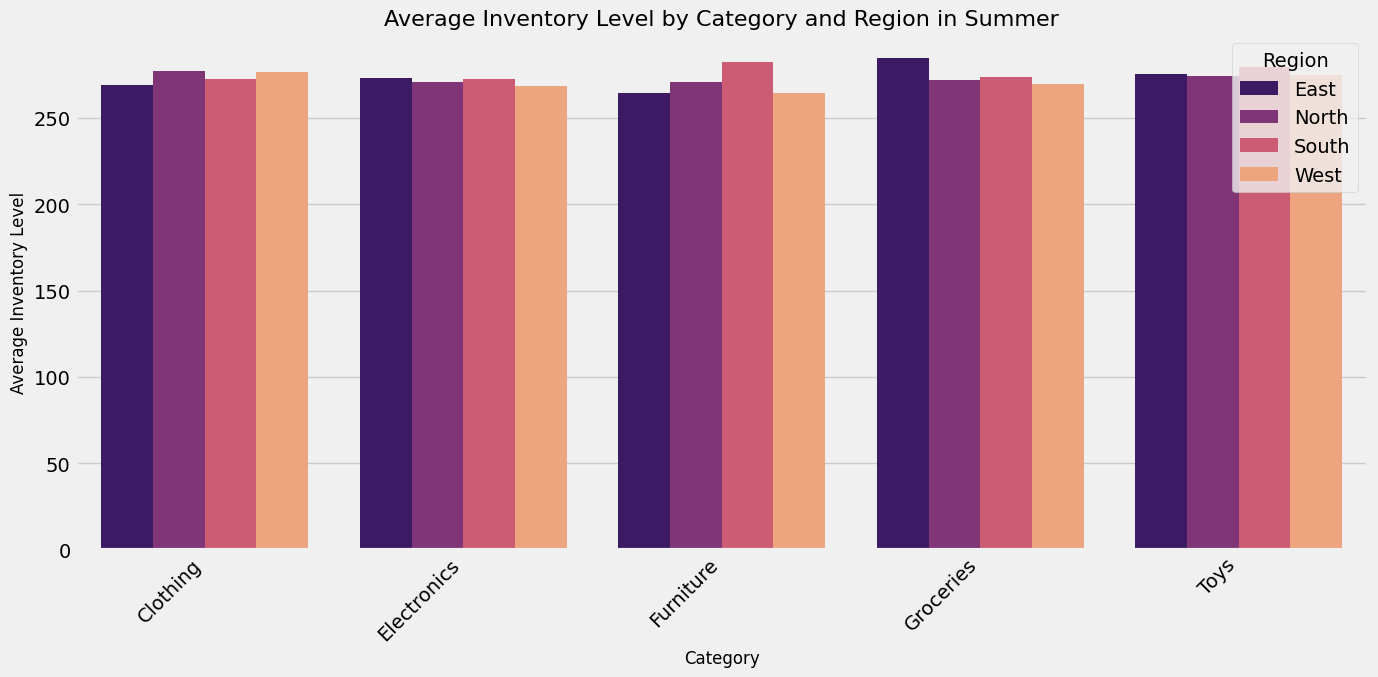

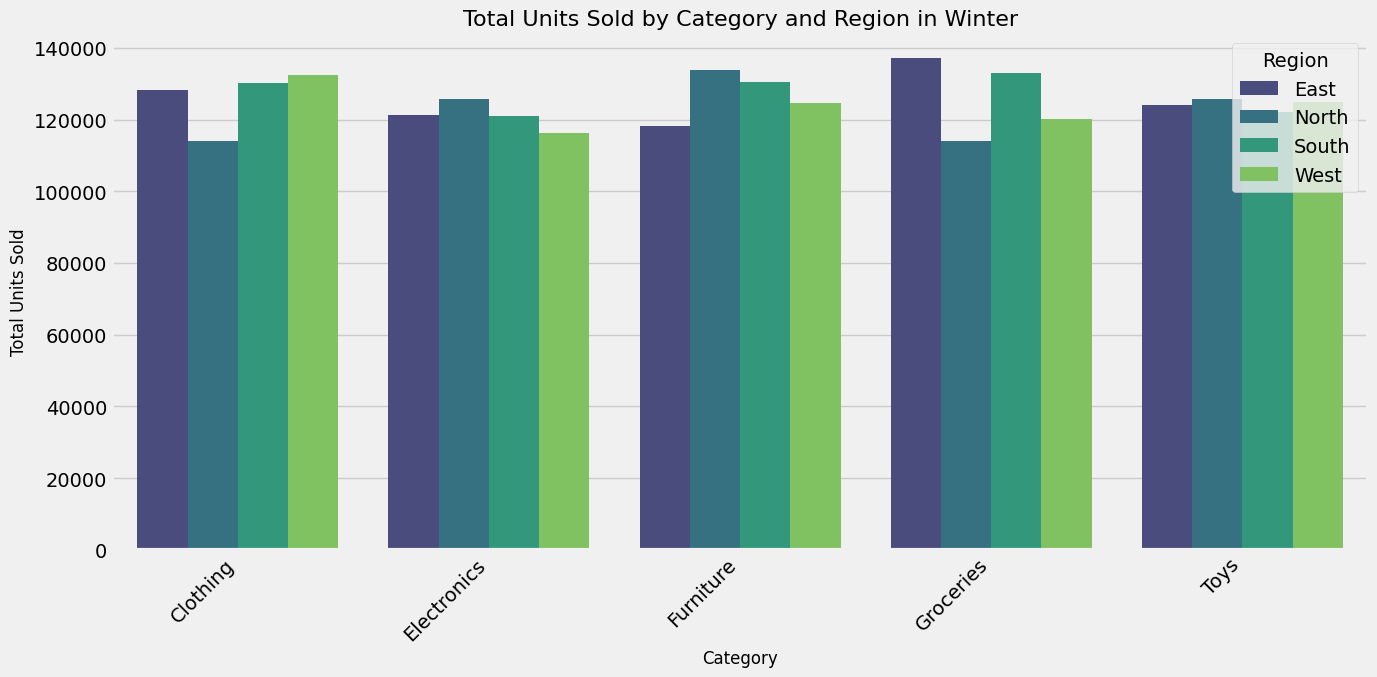

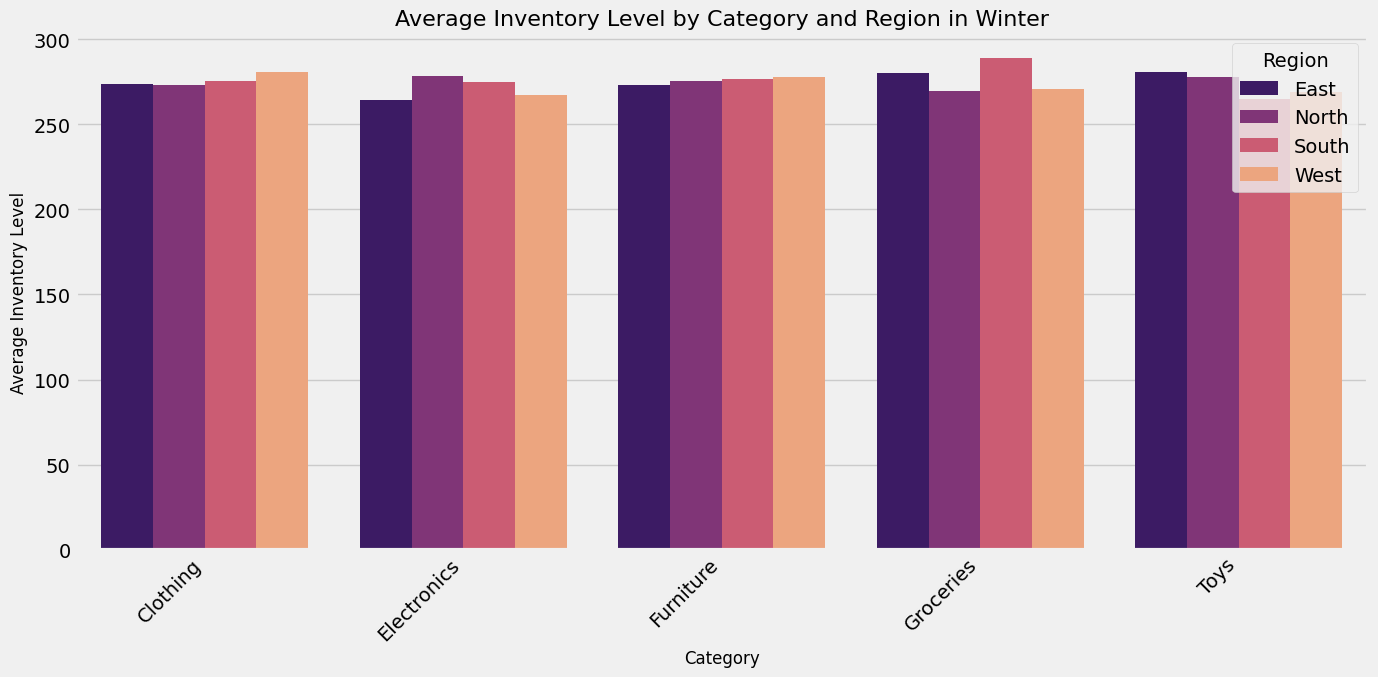

In [ ]:
# Convert 'Date' to datetime and drop incomplete 2024 data
df['Date'] = pd.to_datetime(df['Date'])


# --- 2. Data Aggregation for Analysis ---
# Group by 'Seasonality', 'Region', and 'Category' and calculate the
# total 'Units Sold' and the average 'Inventory Level'
grouped_data = df.groupby(['Seasonality', 'Region', 'Category']).agg(
    Total_Units_Sold=('Units Sold', 'sum'),
    Average_Inventory_Level=('Inventory Level', 'mean')
).reset_index()

# --- 3. Visualization and Comparison ---
print("--- Visualizing Sales and Inventory by Season, Region, and Category ---")

# Separate plots for each seasonality for better readability
for season in grouped_data['Seasonality'].unique():
    seasonal_df = grouped_data[grouped_data['Seasonality'] == season]

    # Plot for Total Units Sold
    plt.figure(figsize=(14, 7))
    sns.barplot(
        x='Category',
        y='Total_Units_Sold',
        hue='Region',
        data=seasonal_df,
        palette='viridis'
    )
    plt.title(f'Total Units Sold by Category and Region in {season}', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Total Units Sold', fontsize=12)
    plt.legend(title='Region')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Plot for Average Inventory Level
    plt.figure(figsize=(14, 7))
    sns.barplot(
        x='Category',
        y='Average_Inventory_Level',
        hue='Region',
        data=seasonal_df,
        palette='magma'
    )
    plt.title(f'Average Inventory Level by Category and Region in {season}', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Average Inventory Level', fontsize=12)
    plt.legend(title='Region')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

MONTHLY UNITS SOLD BY CATEGORY

/tmp/ipython-input-4204467413.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby([pd.Grouper(freq='M'), 'Category'])['Units Sold'].sum().reset_index()


The plot has been created and saved as 'monthly_sales_by_category.png'


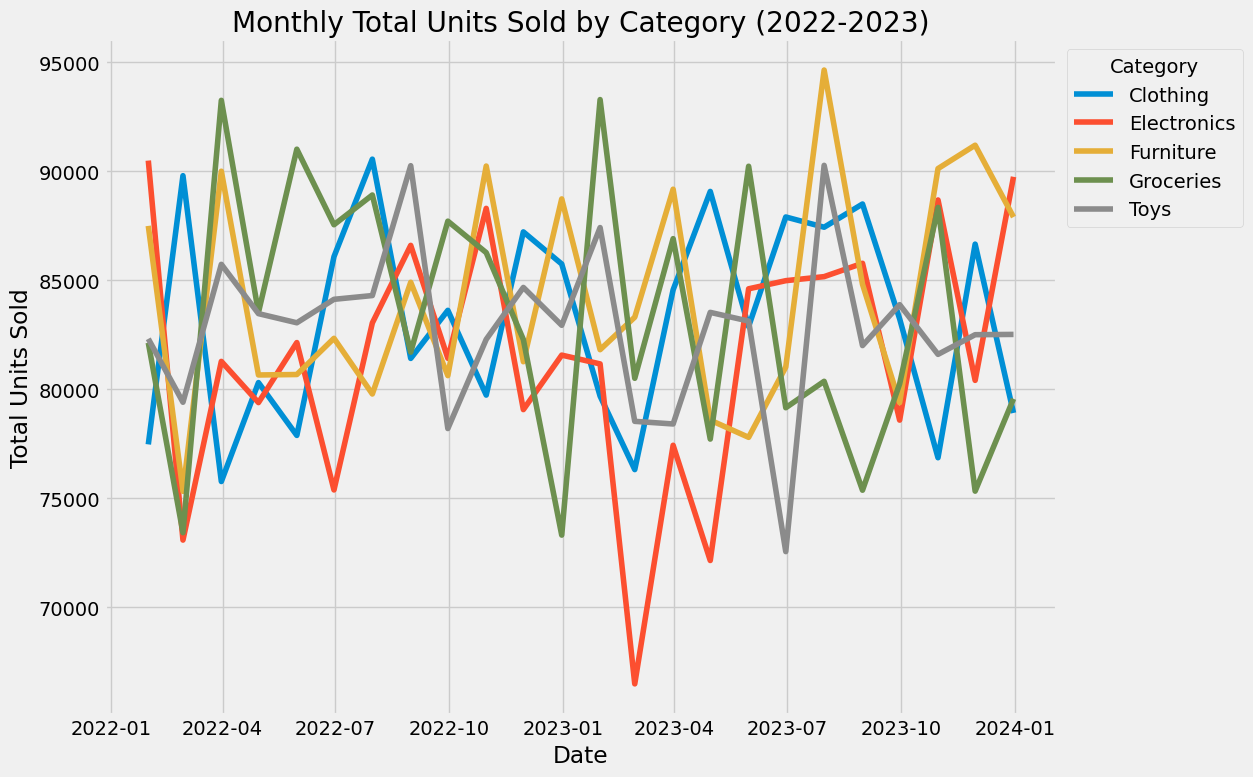

In [ ]:
# Convert 'Date' to datetime objects and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Group by month and category, then sum the 'Units Sold' to get monthly sales
monthly_sales = df.groupby([pd.Grouper(freq='M'), 'Category'])['Units Sold'].sum().reset_index()

# Drop incomplete 2024 data for a clearer plot
monthly_sales = monthly_sales[monthly_sales['Date'].dt.year < 2024]

# Create the plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 8))

# Get a list of unique categories to iterate through
categories = monthly_sales['Category'].unique()

# Plot a line for each category
for category in categories:
    category_data = monthly_sales[monthly_sales['Category'] == category]
    plt.plot(category_data['Date'], category_data['Units Sold'], label=category)

# Set the title and labels
plt.title('Monthly Total Units Sold by Category (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')

# Add a legend outside the plot area to avoid overlap
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show grid for better readability
plt.grid(True)

# Save the plot to a file
plt.savefig('monthly_sales_by_category.png')

# Display a confirmation message
print("The plot has been created and saved as 'monthly_sales_by_category.png'")

COMPETITOR VS OUR PRICING PLOT

/tmp/ipython-input-2422903248.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pricing = df.groupby([pd.Grouper(key='Date', freq='M'), 'Category']).agg({


The pricing comparison plot has been created and saved as 'pricing_comparison_by_category_and_month.png'.


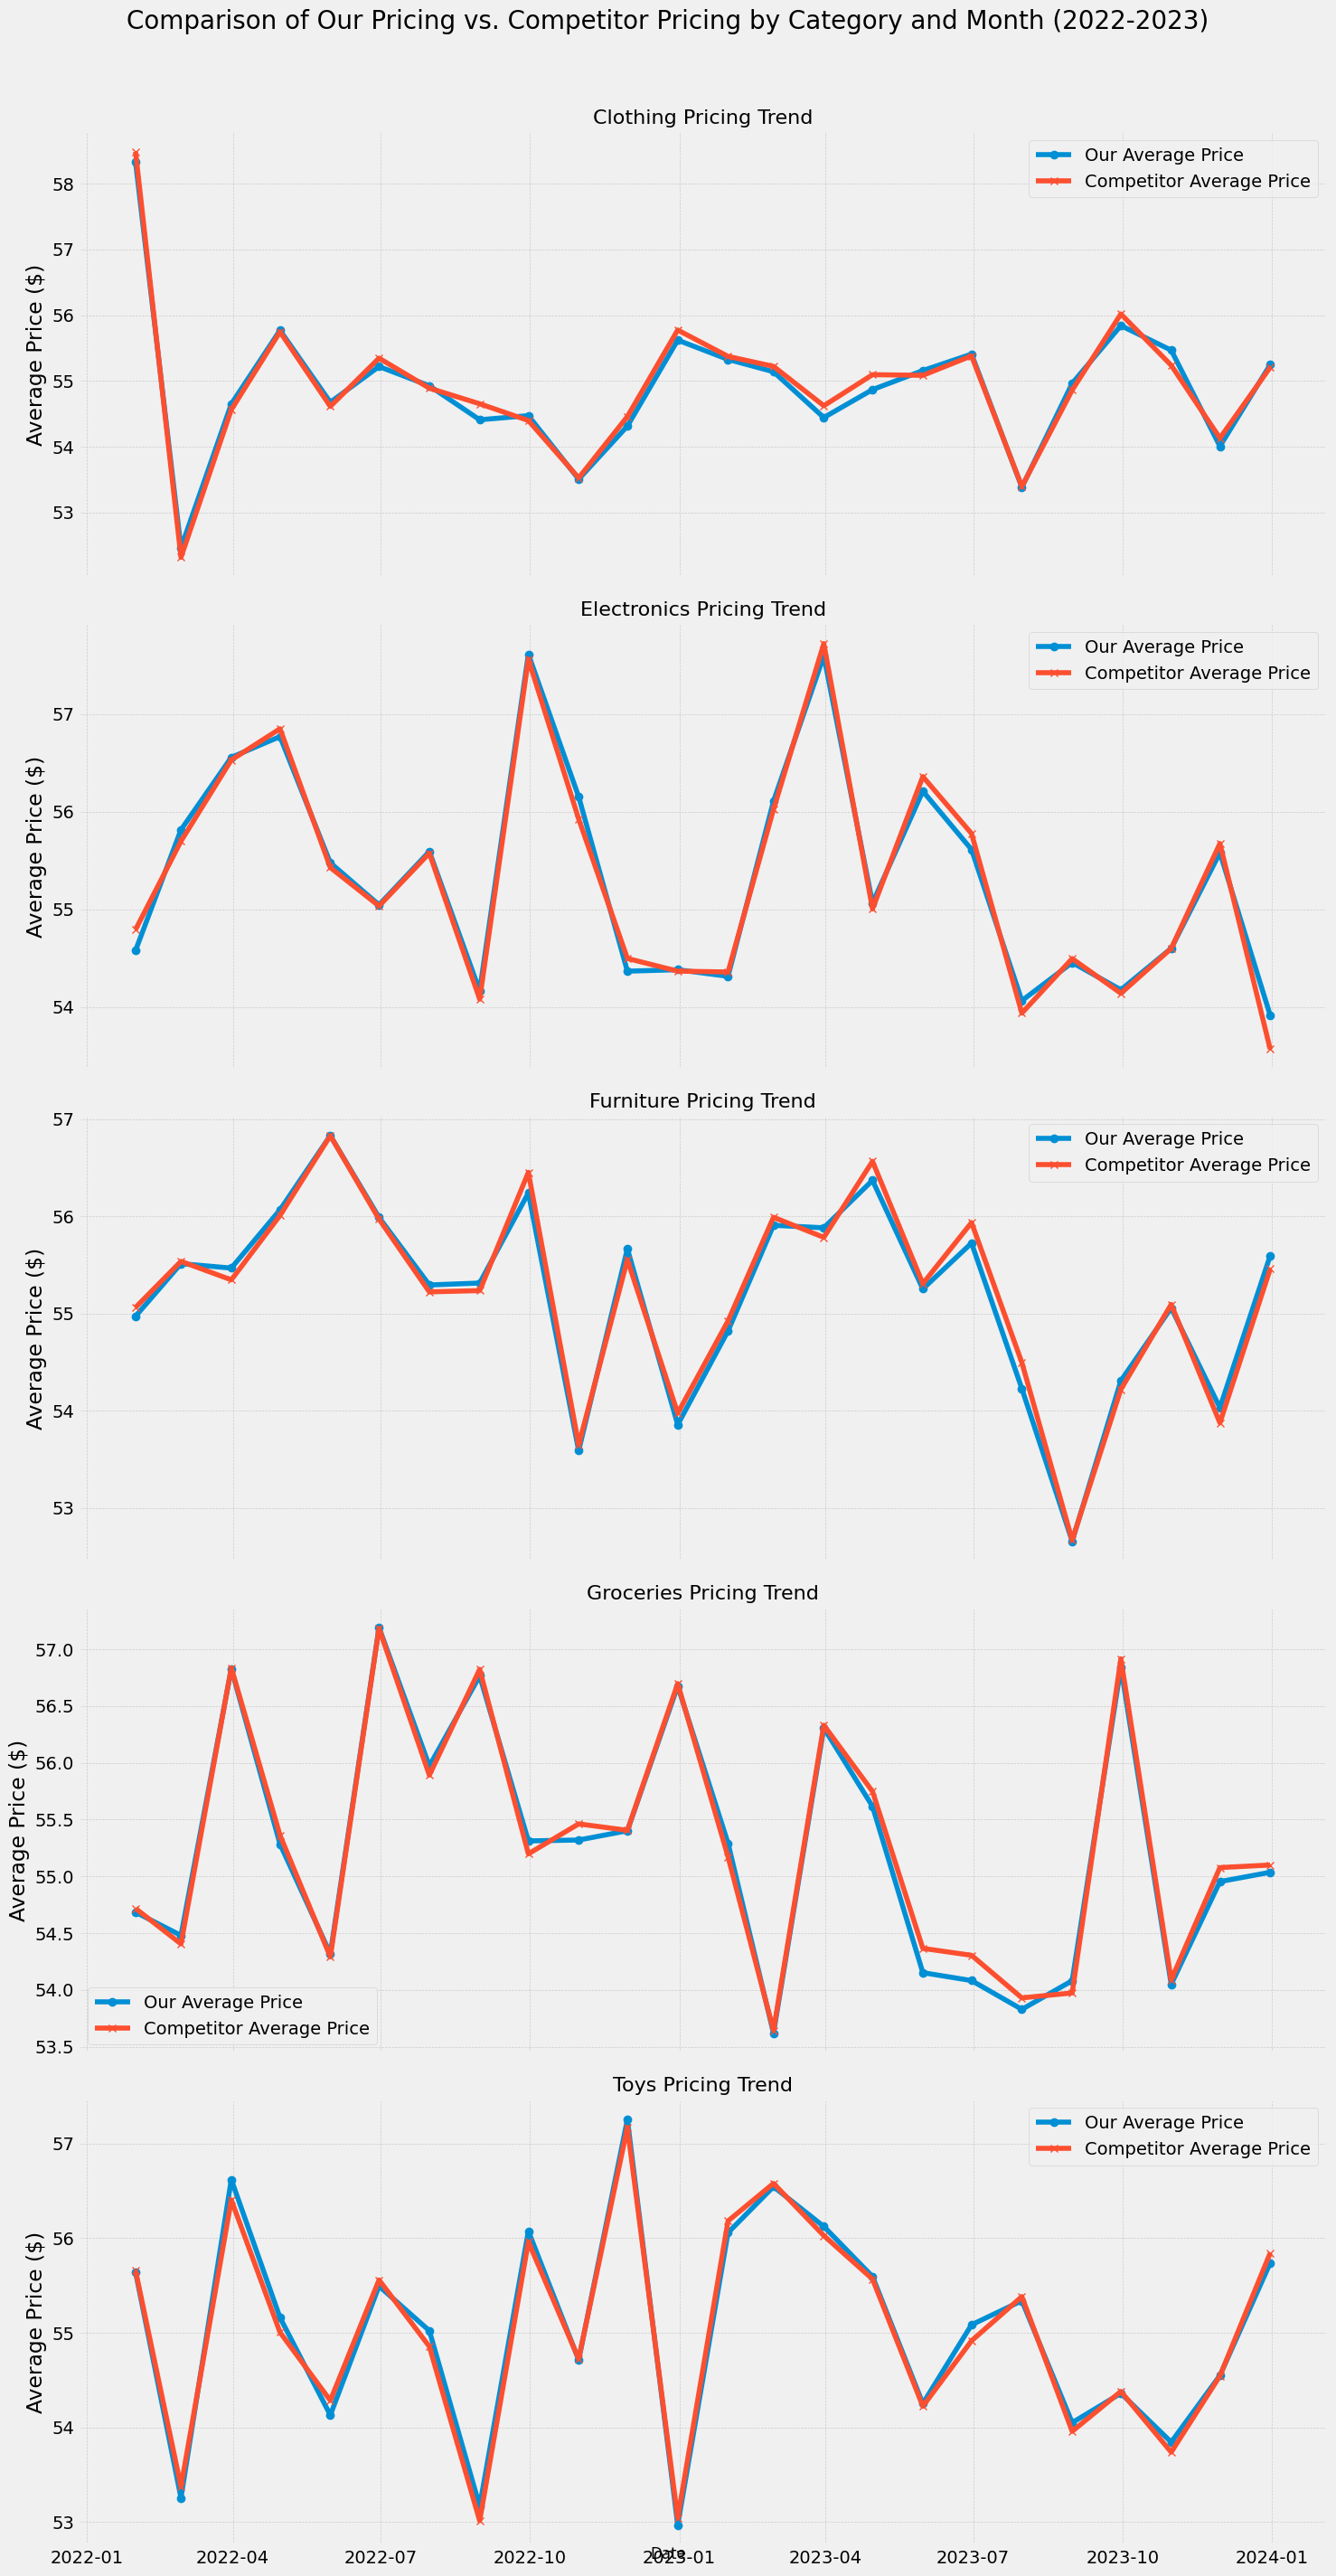

In [ ]:
# Group by month and category, and calculate the average price and competitor price
monthly_pricing = df.groupby([pd.Grouper(key='Date', freq='M'), 'Category']).agg({
    'Price': 'mean',
    'Competitor Pricing': 'mean'
}).reset_index()

# Drop incomplete 2024 data to avoid misleading trends
monthly_pricing = monthly_pricing[monthly_pricing['Date'].dt.year < 2024]

# Create a figure and axes for subplots
categories = monthly_pricing['Category'].unique()
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(15, 6 * len(categories)), sharex=True)

# Plot each category on a separate subplot
for i, category in enumerate(categories):
    category_data = monthly_pricing[monthly_pricing['Category'] == category]

    # Plot our average price
    axes[i].plot(category_data['Date'], category_data['Price'], label='Our Average Price', marker='o')

    # Plot competitor average price
    axes[i].plot(category_data['Date'], category_data['Competitor Pricing'], label='Competitor Average Price', marker='x')

    axes[i].set_title(f'{category} Pricing Trend', fontsize=16)
    axes[i].set_ylabel('Average Price ($)')
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)
    axes[i].legend()

# Set a common x-axis label for the entire figure
fig.text(0.5, 0.04, 'Date', ha='center', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Comparison of Our Pricing vs. Competitor Pricing by Category and Month (2022-2023)', fontsize=20, y=0.98)

# Save the plot
plt.savefig('pricing_comparison_by_category_and_month.png')

print("The pricing comparison plot has been created and saved as 'pricing_comparison_by_category_and_month.png'.")

IDENTIFYING DEAD STOCK AND OVERSTOCK OF UNITS

--- Inventory Health Insights ---

Deadstock Analysis:
Total number of deadstock occurrences: 360

Deadstock occurrences by Category:
Category
Clothing       75
Electronics    74
Furniture      72
Toys           70
Groceries      69
Name: count, dtype: int64

Deadstock occurrences by Region:
Region
North    102
East      97
West      84
South     77
Name: count, dtype: int64

------------------------------

Overstock Analysis:
Total number of overstock occurrences: 34993

Overstock occurrences by Category:
Category
Clothing       7017
Furniture      7004
Groceries      6993
Toys           6990
Electronics    6989
Name: count, dtype: int64

Overstock occurrences by Region:
Region
North    8787
East     8778
West     8734
South    8694
Name: count, dtype: int64

--- Visualizing Inventory Insights ---


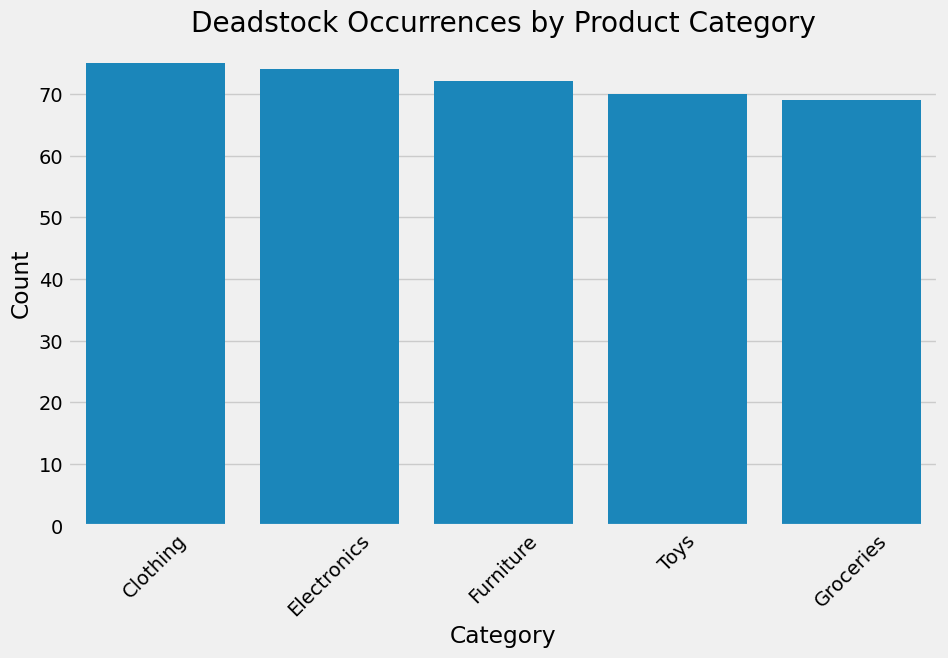

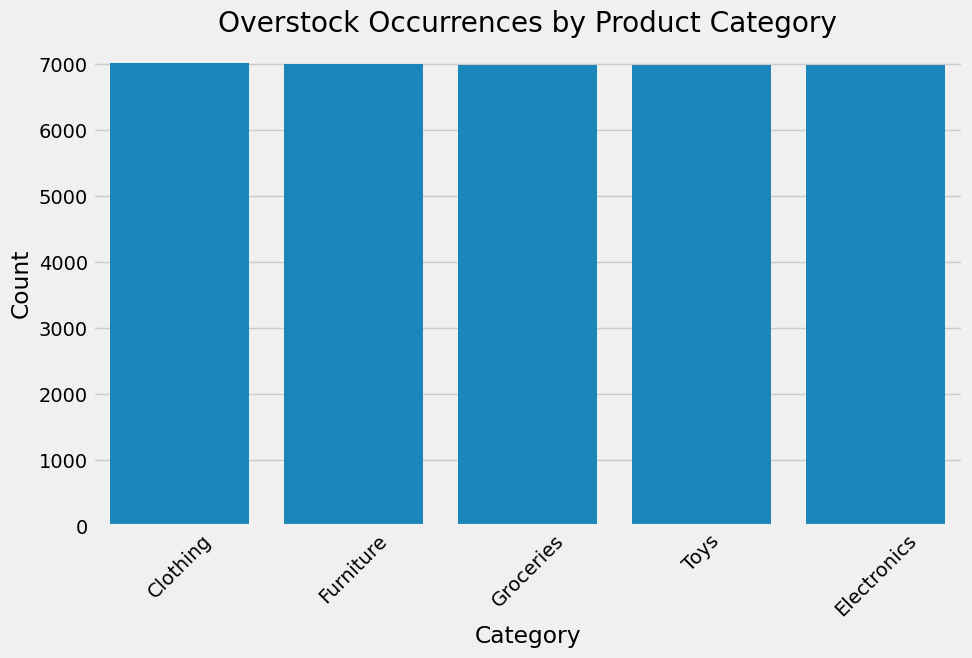

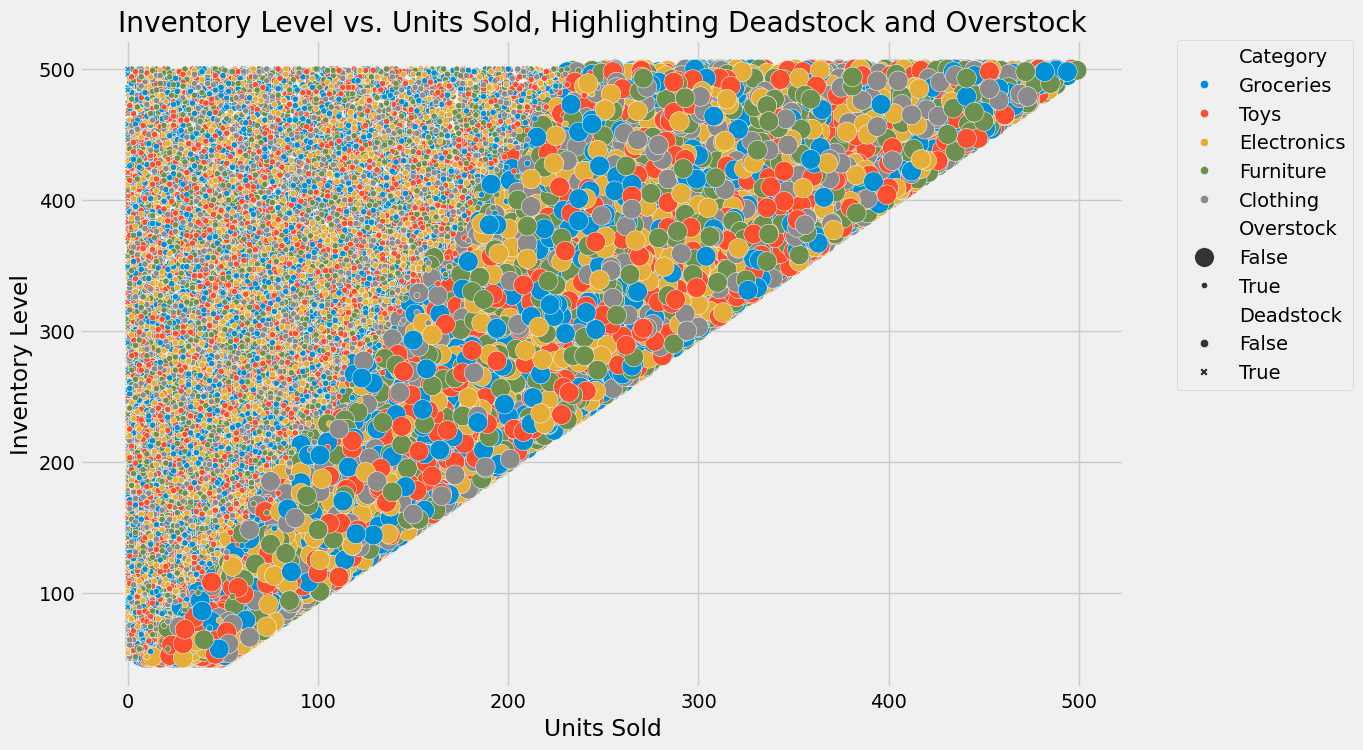

In [ ]:
# Deadstock: Inventory with 0 or very low sales. Let's define it as Units Sold = 0.
df['Deadstock'] = (df['Units Sold'] == 0)

# Overstock: Inventory significantly exceeding demand.
# Let's define it as Inventory Level being more than double the Demand Forecast.
df['Overstock'] = (df['Inventory Level'] > (2 * df['Demand Forecast']))

# --- 2. Exploratory Data Analysis for Inventory Health ---

print("--- Inventory Health Insights ---")
print("\nDeadstock Analysis:")
# Count the number of deadstock occurrences
deadstock_count = df['Deadstock'].sum()
print(f"Total number of deadstock occurrences: {deadstock_count}")

# Deadstock by Category
print("\nDeadstock occurrences by Category:")
deadstock_by_category = df[df['Deadstock'] == True]['Category'].value_counts()
print(deadstock_by_category)

# Deadstock by Region
print("\nDeadstock occurrences by Region:")
deadstock_by_region = df[df['Deadstock'] == True]['Region'].value_counts()
print(deadstock_by_region)

print("\n------------------------------")
print("\nOverstock Analysis:")
# Count the number of overstock occurrences
overstock_count = df['Overstock'].sum()
print(f"Total number of overstock occurrences: {overstock_count}")

# Overstock by Category
print("\nOverstock occurrences by Category:")
overstock_by_category = df[df['Overstock'] == True]['Category'].value_counts()
print(overstock_by_category)

# Overstock by Region
print("\nOverstock occurrences by Region:")
overstock_by_region = df[df['Overstock'] == True]['Region'].value_counts()
print(overstock_by_region)

# --- 3. Bivariate Analysis and Visualization ---

print("\n--- Visualizing Inventory Insights ---")

# Visualize deadstock occurrences by category
plt.figure(figsize=(10, 6))
sns.barplot(x=deadstock_by_category.index, y=deadstock_by_category.values)
plt.title('Deadstock Occurrences by Product Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize overstock occurrences by category
plt.figure(figsize=(10, 6))
sns.barplot(x=overstock_by_category.index, y=overstock_by_category.values)
plt.title('Overstock Occurrences by Product Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Scatter plot to visualize Inventory vs. Units Sold, highlighting deadstock and overstock
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Units Sold', y='Inventory Level', data=df, hue='Category', style='Deadstock', size='Overstock', sizes=(20, 200))
plt.title('Inventory Level vs. Units Sold, Highlighting Deadstock and Overstock')
plt.xlabel('Units Sold')
plt.ylabel('Inventory Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**INVENTORY OPTIMIZATION**

IMPLEMENTED ARIMA MODEL FOR DEMAND FORECASTING ALTHOUGH THE DATRASET HAVE TI BE TRAINED ON STATIONARY DATA

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Function to optimize demand forecast and inventory for a specific store and product
# Uses ARIMA for time-series forecasting on Units Sold (past demand)
# Targets columns: Date, Units Sold (for forecasting), Inventory Level (for optimization)
# Additional: Calculates safety stock based on residuals std, assumes lead time = 7 days, z=1.65 for 95% service level
# Suggests order amount if below reorder point
def optimize_for_store_product(store_id, product_id):
    # Filter and sort the group
    df_group = df[(df['Store ID'] == store_id) & (df['Product ID'] == product_id)].sort_values('Date')

    if len(df_group) < 10:  # Skip if too few data points for meaningful forecast
        return None

    # Set up time series for Units Sold
    ts = df_group.set_index('Date')['Units Sold']

    # Fit ARIMA model (order=(1,1,1) as a simple starting point; can be tuned with auto_arima if pmdarima is available, but sticking to statsmodels)
    model = ARIMA(ts, order=(1,1,1))
    model_fit = model.fit()

    # Forecast next 30 days (adjustable; here for medium-term planning)
    forecast_steps = 30
    forecast = model_fit.forecast(steps=forecast_steps)

    # Mean daily forecast for optimization
    mean_forecast = forecast.mean()

    # Residuals for uncertainty estimation
    fitted = model_fit.fittedvalues.reindex(ts.index)  # Align indices
    residuals = ts - fitted
    std_residuals = residuals.std()
        # Safety stock calculation
    z = 1.65  # Z-score for 95% service level
    lead_time = 7  # Assumed lead time in days (can be adjusted or derived from data if available)
    safety_stock = z * std_residuals * np.sqrt(lead_time)

    # Reorder point: average demand during lead time + safety stock
    reorder_point = mean_forecast * lead_time + safety_stock

    # Current (last) inventory level
    current_inventory = df_group.iloc[-1]['Inventory Level']

    # Suggested order: If below reorder point, order enough to reach reorder point + one lead time demand (simple policy)
    if current_inventory < reorder_point:
        suggested_order = (reorder_point - current_inventory) + (mean_forecast * lead_time)
    else:
        suggested_order = 0

    # Return results
    return {
        'store_id': store_id,
        'product_id': product_id,
        'mean_daily_forecast': mean_forecast,
        '30_day_forecast': forecast.tolist(),
        'safety_stock': safety_stock,
        'reorder_point': reorder_point,
        'current_inventory': current_inventory,
        'suggested_order_amount': suggested_order
    }

# Example: Optimize for one store-product pair
example_result = optimize_for_store_product('S001', 'P0001')
print("Example Optimization Result:")
print(example_result)

# To apply to all store-product combinations and collect results in a DataFrame
# (This may take time for large datasets; parallelize if needed with joblib or multiprocessing)
unique_pairs = df[['Store ID', 'Product ID']].drop_duplicates()
results = []
for _, row in unique_pairs.iterrows():
    res = optimize_for_store_product(row['Store ID'], row['Product ID'])
    if res:
        results.append(res)

# Convert to DataFrame for easy viewing/export
results_df = pd.DataFrame(results)
print("\nSummary of Optimizations (first 5):")
print(results_df.head())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Example Optimization Result:
{'store_id': 'S001', 'product_id': 'P0001', 'mean_daily_forecast': np.float64(137.44198108599207), '30_day_forecast': [138.6906132238201, 137.3844695040519, 137.39960839954537, 137.39943293175168, 137.39943496551606, 137.39943494194367, 137.39943494221689, 137.39943494221373, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376, 137.39943494221376], 'safety_stock': np.float64(474.3365011436156), 'reorder_point': np.float64(1436.43036874556), 'current_inventory': np.int64(135), 'suggested_order_amount': np.float64(2263.5242363475045)}


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat


Summary of Optimizations (first 5):
  store_id product_id  mean_daily_forecast  \
0     S001      P0001           137.441981   
1     S001      P0002           120.035381   
2     S001      P0003           141.987612   
3     S001      P0004           140.851316   
4     S001      P0005           133.174178   

                                     30_day_forecast  safety_stock  \
0  [138.6906132238201, 137.3844695040519, 137.399...    474.336501   
1  [110.66176954022748, 119.56249114881454, 120.3...    453.743019   
2  [141.93476629838003, 141.99228476539065, 141.9...    471.051967   
3  [141.02108736144658, 140.84719888802027, 140.8...    498.356046   
4  [139.9473005359294, 132.35668045209223, 133.01...    468.982343   

   reorder_point  current_inventory  suggested_order_amount  
0    1436.430369                135             2263.524236  
1    1293.990688                121             2013.238357  
2    1464.965252                253             2205.878538  
3    1484.315261 

WITH THE HELP OF RANDOM FOREST, LIGHTGBM, XGM REGRESSOR MODEL TRIED TO FORECAST THE SAFETY STOCK, REORDER POINT, ORDER AMOUNT AND 30 DAY ORDERS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb

def forecast_optimize_for_store_product(store_id, product_id):
    # Filter and sort the group
    df_group = df[(df['Store ID'] == store_id) & (df['Product ID'] == product_id)].sort_values('Date').copy()

    if len(df_group) < 30:  # Skip if too few data points
        return None

    # Reset index to make 'Date' a column
    df_group = df_group.reset_index()

    # Create lag features for Units Sold
    for lag in [1, 2, 3, 7, 14]:
        df_group[f'lag_{lag}'] = df_group['Units Sold'].shift(lag)

    # Rolling statistics
    df_group['rolling_mean_7'] = df_group['Units Sold'].rolling(window=7).mean().shift(1)
    df_group['rolling_std_7'] = df_group['Units Sold'].rolling(window=7).std().shift(1)

    # Time-based features
    df_group['dayofweek'] = df_group['Date'].dt.dayofweek
    df_group['month'] = df_group['Date'].dt.month
    df_group['year'] = df_group['Date'].dt.year

    # Encode categorical columns
    categorical_cols = ['Category', 'Region', 'Weather Condition', 'Seasonality']
    for col in categorical_cols:
        if col in df_group.columns:  # Check if the column exists before encoding
            df_group[col] = pd.Categorical(df_group[col]).codes


    # Feature list
    features = [
        'lag_1', 'lag_2', 'lag_3', 'lag_7', 'lag_14',
        'rolling_mean_7', 'rolling_std_7',
        'dayofweek', 'month', 'year',
        'Price', 'Discount', 'Competitor Pricing', 'Holiday/Promotion'
    ] + [col for col in df_group.columns if col in categorical_cols] # Add encoded categorical columns


    target = 'Units Sold'

    # Drop rows with NaN values
    df_group = df_group.dropna(subset=features + [target])

    X = df_group[features]
    y = df_group[target]

    # Split into train and test (70/30)
    train_size = int(len(X) * 0.7)
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    if len(X_test) == 0:
        return None

    # Define models
    models = {
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42, verbose=-1),
        'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
    }

    results = {}
    best_model = None
    best_rmse = float('inf')
    best_name = ''

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        results[name] = rmse
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_name = name

    # Get residuals for safety stock calculation
    test_preds = best_model.predict(X_test)
    residuals = y_test - test_preds
    std_residuals = np.std(residuals)

    # Prepare for forecasting next 30 days
    forecast_steps = 30
    last_date = df_group['Date'].max()
    future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=forecast_steps)

    future_df = pd.DataFrame({'Date': future_dates})

    # Assume future exogenous remain constant as last known
    for col in ['Price', 'Discount', 'Competitor Pricing', 'Holiday/Promotion'] + [c for c in df_group.columns if c in categorical_cols]:
         if col in df_group.columns:
             future_df[col] = df_group[col].iloc[-1]


    future_df['dayofweek'] = future_df['Date'].dt.dayofweek
    future_df['month'] = future_df['Date'].dt.month
    future_df['year'] = future_df['Date'].dt.year

    # Initialize recent solds for lags and rollings
    max_lag = 14
    recent_solds = list(df_group['Units Sold'].tail(max_lag))

    forecasts = []

    for step in range(forecast_steps):
        # Compute current features
        curr_features = {
            'lag_1': recent_solds[-1] if len(recent_solds) >= 1 else np.nan,
            'lag_2': recent_solds[-2] if len(recent_solds) >= 2 else np.nan,
            'lag_3': recent_solds[-3] if len(recent_solds) >= 3 else np.nan,
            'lag_7': recent_solds[-7] if len(recent_solds) >= 7 else np.nan,
            'lag_14': recent_solds[-14] if len(recent_solds) >= 14 else np.nan,
            'rolling_mean_7': np.mean(recent_solds[-7:]) if len(recent_solds) >= 7 else np.nan,
            'rolling_std_7': np.std(recent_solds[-7:]) if len(recent_solds) >= 7 else np.nan,
        }

        # Add other features from future_df
        for col in ['dayofweek', 'month', 'year', 'Price', 'Discount', 'Competitor Pricing', 'Holiday/Promotion'] + [c for c in df_group.columns if c in categorical_cols]:
             if col in future_df.columns:
                curr_features[col] = future_df.iloc[step][col]


        X_future = pd.DataFrame([curr_features])

        # Predict
        pred = best_model.predict(X_future)[0]
        forecasts.append(pred)

        # Update recent_solds
        recent_solds.append(pred)
        recent_solds = recent_solds[-max_lag:]

    # Mean daily forecast
    mean_forecast = np.mean(forecasts)

    # Safety stock
    z = 1.65  # 95% service level
    lead_time = 7  # days
    safety_stock = z * std_residuals * np.sqrt(lead_time)

    # Reorder point
    reorder_point = mean_forecast * lead_time + safety_stock

    # Current inventory
    current_inventory = df_group['Inventory Level'].iloc[-1]

    # Suggested order
    if current_inventory < reorder_point:
        suggested_order = (reorder_point - current_inventory) + (mean_forecast * lead_time)
    else:
        suggested_order = 0

    return {
        'store_id': store_id,
        'product_id': product_id,
        'best_model': best_name,
        'test_rmse': best_rmse,
        'mean_daily_forecast': mean_forecast,
        '30_day_forecast': forecasts,
        'safety_stock': safety_stock,
        'reorder_point': reorder_point,
        'current_inventory': current_inventory,
        'suggested_order_amount': suggested_order
    }

# Example: Optimize for one store-product pair
example_result = forecast_optimize_for_store_product('S001', 'P0001')
print("Example Optimization Result:")
print(example_result)

# To apply to all unique store-product pairs
unique_pairs = df[['Store ID', 'Product ID']].drop_duplicates()
results = []
for _, row in unique_pairs.iterrows():
    res = forecast_optimize_for_store_product(row['Store ID'], row['Product ID'])
    if res:
        results.append(res)

# Convert to DataFrame
results_df = pd.DataFrame(results)
print("\nSummary of Optimizations (first 5):")
display(results_df.head())

Example Optimization Result:
{'store_id': 'S001', 'product_id': 'P0001', 'best_model': 'RandomForest', 'test_rmse': np.float64(115.3938110065035), 'mean_daily_forecast': np.float64(193.04633333333337), '30_day_forecast': [np.float64(132.95), np.float64(121.09), np.float64(132.39), np.float64(160.21), np.float64(175.53), np.float64(174.54), np.float64(186.46), np.float64(206.61), np.float64(194.94), np.float64(209.38), np.float64(203.32), np.float64(189.63), np.float64(222.7), np.float64(204.9), np.float64(208.65), np.float64(216.07), np.float64(212.07), np.float64(204.77), np.float64(211.15), np.float64(202.55), np.float64(202.91), np.float64(216.18), np.float64(201.0), np.float64(211.01), np.float64(200.64), np.float64(197.58), np.float64(203.34), np.float64(178.6), np.float64(205.52), np.float64(204.7)], 'safety_stock': np.float64(503.3184487282136), 'reorder_point': np.float64(1854.642782061547), 'current_inventory': np.int64(135), 'suggested_order_amount': np.float64(3070.967115394

store_id product_id    best_model   test_rmse  mean_daily_forecast  \
0     S001      P0001  RandomForest  115.393811           193.046333   
1     S001      P0002  RandomForest   97.162213           162.175333   
2     S001      P0003  RandomForest  116.365171           138.329667   
3     S001      P0004  RandomForest  117.429784           136.741667   
4     S001      P0005  RandomForest  108.868660           118.970000   

                                     30_day_forecast  safety_stock  \
0  [132.95, 121.09, 132.39, 160.21, 175.53, 174.5...    503.318449   
1  [151.33, 160.68, 161.65, 143.28, 152.6, 141.3,...    412.057623   
2  [127.88, 125.4, 126.16, 134.76, 143.73, 156.71...    506.496269   
3  [168.17, 130.88, 109.3, 120.97, 145.36, 171.87...    511.187885   
4  [138.34, 104.01, 162.43, 99.4, 147.44, 112.94,...    474.919335   

   reorder_point  current_inventory  suggested_order_amount  
0    1854.642782                135             3070.967115  
1    1547.284956                121             2561.512290  
2    1474.803936                253             2190.111602  
3    1468.379552                347             2078.571218  
4    1307.709335                224             1916.499335

In [ ]:
# Group by 'Store ID' and 'Product ID' to get total units ordered and sold
logistics_data = df.groupby(['Store ID', 'Product ID']).agg(
    total_units_ordered=('Units Ordered', 'sum'),
    total_units_sold=('Units Sold', 'sum')
).reset_index()

# Calculate the Order-to-Sales Ratio. Use np.inf for cases where Units Sold is 0 to highlight extreme bottlenecks
logistics_data['Order-to-Sales Ratio'] = np.where(
    logistics_data['total_units_sold'] > 0,
    logistics_data['total_units_ordered'] / logistics_data['total_units_sold'],
    np.inf
)

# Identify the top 10% of products with the highest ratios as potential bottlenecks
# A high ratio means many units were ordered but few were sold
bottleneck_threshold = logistics_data['Order-to-Sales Ratio'].quantile(0.9)
logistical_bottlenecks = logistics_data[logistics_data['Order-to-Sales Ratio'] >= bottleneck_threshold]

# Sort the results to show the worst bottlenecks first
logistical_bottlenecks = logistical_bottlenecks.sort_values(by='Order-to-Sales Ratio', ascending=False)

print("--- Identified Logistical Bottlenecks (Top 10%) ---")
print(f"Products with an Order-to-Sales Ratio of {bottleneck_threshold:.2f} or higher.")
print(logistical_bottlenecks[['Store ID', 'Product ID', 'total_units_ordered', 'total_units_sold', 'Order-to-Sales Ratio']])

--- Identified Logistical Bottlenecks (Top 10%) ---
Products with an Order-to-Sales Ratio of 0.85 or higher.
   Store ID Product ID  total_units_ordered  total_units_sold  \
40     S003      P0001                82404             94506   
27     S002      P0008                81693             94182   
34     S002      P0015                82649             95439   
1      S001      P0002                82638             95690   
21     S002      P0002                81232             94117   
9      S001      P0010                83051             96686   
38     S002      P0019                82132             96125   
12     S001      P0013                82502             96911   
66     S004      P0007                81023             95192   
77     S004      P0018                79981             94022   

    Order-to-Sales Ratio  
40              0.871945  
27              0.867395  
34              0.865988  
1               0.863601  
21              0.863096  
9            